![Taming the TwitterVerse.png](<attachment:Taming the TwitterVerse.png>)

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 15px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'> | </span> </span></b>Defining the Question</b></p></div>

## <b><span style='color:#F1A424'>|</span> Executive Summary:</b> 

**In the dynamic world of politics, public perception plays a crucial role in shaping the success or failure of a political figure. Leveraging the power of social media, particularly Twitter, has become an indispensable tool for political leaders to connect with their constituents, gauge public sentiment, and build a strong brand identity. However, effectively managing and understanding the vast amount of data generated on Twitter can be a daunting task. This is where Twitter sentiment analysis using NLP (Natural Language Processing) emerges as a powerful solution.**

## <b><span style='color:#F1A424'>|</span> Problem Statement:</b> 

**Our client, a prominent political figure, seeks to enhance their brand reputation and strengthen their connection with their followers on Twitter. They recognize the importance of understanding public sentiment and identifying emerging trends in online conversations. However, manually analyzing the sheer volume of tweets directed at their account is a time-consuming and resource-intensive endeavor.**

## <b><span style='color:#F1A424'>|</span> Proposed Solution:</b> 

**We propose implementing a Twitter sentiment analysis NLP project to automatically extract and analyze sentiment from tweets directed at the client's Twitter account. This solution will provide valuable insights into the public's perception of the client's policies, actions, and overall brand image.**

## <b><span style='color:#F1A424'>|</span> Data Pertinence and Attribution:</b> 

**Data Source:**

- Twitter account: Dr. Miguna Miguna (@MigunaMiguna)
- Date range: January 1, 2019 - April 28, 2022
- Number of tweets: 43,479
- Attribution: The data used in this project was scraped from Twitter using Twint, an unofficial Twitter scraper. The data is publicly available on Twitter and is not owned by the author of this project.
- Dataset Link: https://1drv.ms/u/s!Ai_PPIpft10FsDSw2ufEeAfxx8u4?e=c6ebBe


## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>1 |</span></span></b>Data Loading & Preparation</b></p></div>

## <b>1.1 <span style='color:#F1A424'>|</span> Importing Necessary Libraries</b> 

In [2]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #plotting statistical graphs
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import squarify
from collections import Counter

# Load the Text Cleaning Package
import neattext.functions as nfx

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm ##new progress bars repeatedly
import os
import nltk ##building Python programs to work with human language data
#import spacy #for training the NER model tokenize words
#import random
#from spacy.util import compounding
#from spacy.util import minibatch


pd.set_option('max_colwidth', 400)
pd.set_option('use_mathjax', False)


import warnings
warnings.filterwarnings("ignore")

## <b>1.2 <span style='color:#F1A424'>|</span>Loading in our Data</b> 

In [3]:
# load the dataset -> feature extraction -> data visualization -> data cleaning -> train test split
# -> model building -> model training -> model evaluation -> model saving -> streamlit application deploy

# load the dataset just using specific features
df = pd.read_csv(r'D:\Natural Language Processing\Phase 4 Project\data\miguna_latest.csv', usecols=['id', 'date', 'username', 'tweet'])

df.head()

id        date      username  \
0  1519644754077753344  2022-04-28  migunamiguna   
1  1519642090862432258  2022-04-28  migunamiguna   
2  1519350946161217537  2022-04-27  migunamiguna   
3  1519348400671633413  2022-04-27  migunamiguna   
4  1519335863456518144  2022-04-27  migunamiguna   

                                                                                                                                                                                                                                                                                      tweet  
0     Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th.   #RejectRailaOdinga  
1  President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.  
2              You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?  
3                                                                                                                                                             @senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.  
4                                                                                                                                                                                                     @FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>2 |</span></span></b> Data Quality Checks</b></p></div>
   
- **Another crucial step in any project involves ensuring the quality of your data. Remember that your model’s performance is directly tied to the data it processes. Therefore, take the time to remove duplicates and handle missing values appropriately.**

- **Here we always check for missing values, outliers and remove any unnecessary variables/features/columns. Since we have text data, outliers cannot be checked.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43478 entries, 0 to 43477
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        43478 non-null  int64 
 1   date      43478 non-null  object
 2   username  43478 non-null  object
 3   tweet     43478 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


## <b>2.1 <span style='color:#F1A424'>|</span> Checking for NaN Values</b> 

In [5]:
print(df.isna().sum())
print("*"*40)

id          0
date        0
username    0
tweet       0
dtype: int64
****************************************


**As noted earlier, we don not have any null values.**

## <b>2.2 <span style='color:#F1A424'>|</span> Checking for Sentence Length Consistency</b> 

In [6]:
df['tweet'].apply(len).value_counts()

tweet
280    2222
279    1555
278    1504
277    1297
276    1166
       ... 
458       2
479       2
421       2
369       2
370       2
Name: count, Length: 440, dtype: int64

**This can give you an overview of the number of words per tweet. We also notice that some consist of less then five words hence won't be instrumental in constructing our predictive model.**

In [7]:
sum(df['tweet'].apply(len) > 5) , sum(df['tweet'].apply(len) <= 5)

(43464, 14)

**We have `43464` tweets with characters gretaer than 5 and only `14` tweets with characters less than 5 characters.**

In [8]:
print("Shape of the dataset before filtering:")
print(df.shape)
print("*"*40)
df = df[df['tweet'].apply(len) > 5]
print("Shape of the dataset after filtering:")
print(df.shape)

Shape of the dataset before filtering:
(43478, 4)
****************************************
Shape of the dataset after filtering:
(43464, 4)


## <b>2.3 <span style='color:#F1A424'>|</span> Checking for Duplicates</b> 

In [9]:
print(df.duplicated().sum())
print("*"*40)

21772
****************************************


**We will have to check if indeed these are duplicate values.**

In [10]:
# checking if the duolicate values are indeed duplicates
df[df.duplicated(subset=['tweet'],keep=False)].sort_values(by='tweet').sample(10)

id        date      username  \
27555  1298228369071497216  2020-08-25  migunamiguna   
33112  1217439228927279104  2020-01-15  migunamiguna   
14282  1175807906383577089  2019-09-22  migunamiguna   
8635   1254093681419829249  2020-04-25  migunamiguna   
42991  1088815405613924352  2019-01-25  migunamiguna   
18112  1130849565211389952  2019-05-21  migunamiguna   
11286  1218630918518210561  2020-01-18  migunamiguna   
26377  1359657573109088259  2021-02-11  migunamiguna   
17983  1132371196299890690  2019-05-25  migunamiguna   
4585   1369620223243001856  2021-03-10  migunamiguna   

                                                                                                                                                                                                                                                                                                                            tweet  
27555                                                                                                         Whereas Jaramogi was lured by Dictator Moi through Orengo and Pattni; Conman Raila Odinga was a thief before Despot Uhuru Kenyatta lured him through David Murathe and Janet Mohamed. #UhuruMustGo #DespotsMustFall  
33112  @solo3maina @DidGraphics @RailaOdinga Anyone who does not correct you in order to IMPROVE your condition is not worth supporting or befriending. Liberate and DECOLONIZE your mind. Despots and conmen have convinced you that you are nothing and not worth being EMPOWERED. So, you accept to speak like wajinga. Learn.  
14282                                                                                                                                                                                                                                                                                            @lyclinton1 St. Mary's, Nairobi.  
8635                     Thank you to my ONE MILLION followers. I REDEDICATE my commitment to the REVOLUTION and the STRUGGLE FOR JUSTICE. We shall use verifiable facts derived from credible evidence, present cogent opinions based on those facts, and apply logic to DEFEAT DESPOTISM. #uhurumustgo  https://t.co/jCNpzUx2il  
42991                                                                                                                                                                                                                             @Ivan12988274 @UKenyatta Why are you reading my Tweets if "no one" listens? Aren't you someone?  
18112                                             3/ There should be no AMNESTY to criminals - thieves, land-grabbers, drug dealers, money launderers and murderers. Amnesty has no policy, legal or constitutional justification. Only courts have discretion to reduce sentences after findings of guilt. #AntiCorruptionFailKE  
11286                                    Despot Uhuru Kenyatta and Conman Raila Odinga don't know or care about the problems ordinary Kenyans go through. They have never been hungry. They have never lacked school fees. They have had privileges and feel entitled. Wake up Kenyans. Remove the despots and Conmen from power.  
26377             Despot Uhuru Kenyatta using this THUG to threaten my friends and former workers.  Corporal John Mwaura Kimani ID# 20253032 PIN# A002874301Z Admin Police Badge 002AG Station: Nairobi 0101-047-0103  Incr. OCTRoD 30 June 2038  EXPOSE. SHAME. DEFEAT! #DespotsMustFall #RevolutionNow  https://t.co/TUZmnNpdm5  
17983              A whistleblower is a MEMBER of a CABAL who is privy to and INFORMS ON his COLLEAGUES for crimes they have committed TOGETHER but which he now wants to expose. When did @RailaOdinga join the cabal? Who are its members? What are the full details of their crimes? #DespotsMustFall  https://t.co/qmxLYOYVGQ  
4585                                                                                                                                                                   

In [11]:
df[df['id'] == 1094014959636410368]

id        date      username    tweet
20988  1094014959636410368  2019-02-08  migunamiguna  Salute!
42687  1094014959636410368  2019-02-08  migunamiguna  Salute!

**We can see that the dataset does indeed contain entries that are duplicate tweets. We will go ahead and drop these duplicate entries although the number of duolicates `21772` accounts for almost half of our data.**

In [12]:
df = df.drop_duplicates()

print(df.duplicated().sum())
print("*"*40)

0
****************************************


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21692 entries, 0 to 21778
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        21692 non-null  int64 
 1   date      21692 non-null  object
 2   username  21692 non-null  object
 3   tweet     21692 non-null  object
dtypes: int64(1), object(3)
memory usage: 847.3+ KB


## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>3 |</span></span></b> Data Preprocessing</b></p></div>

- **Preprocessing procedures are tokenizing(spliting),stemming and lemmatization which are dependent on the model you choose to use.**

## <b>3.1 <span style='color:#F1A424'>|</span> Text Cleaning (Source Text)</b> 
+ Mentions / User handles
+ Hashtags
+ URLs
+ Special Characters
+ Whitespaces
+ Emojis
+ Contractions
+ Stopwords

**For cleaning our text we will be using the NeatText Library. NeatText is a simple NLP package for cleaning textual data and text preprocessing. It offers a variety of features for cleaning unstructured text data, reducing noise (such as special characters and stopwords), and extracting specific information from the text. It can be used via an object-oriented approach or a functional/method-oriented approach, providing flexibility in its usage. The package includes classes such as TextCleaner, TextExtractor, and TextMetrics for different text processing tasks.**

https://pypi.org/project/neattext/

In [14]:
# load the text cleaning packages

import neattext as nt
import neattext.functions as nfx

# Methods and Attributes of the function
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

### <b>3.1.1 <span style='color:#F1A424'>|</span> Mentions / User Handles</b> 

In [15]:
# Noise scan
df['tweet'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise'])

0         7.581227
1        12.142857
2        10.447761
3        12.000000
4        12.941176
           ...    
21774    10.238908
21775    11.827957
21776    10.958904
21777    11.913357
21778    12.340426
Name: tweet, Length: 21692, dtype: float64

In [16]:
# Ensure all entries in 'tweet' column are strings
df['tweet'] = df['tweet'].astype(str)

# Now apply the clean_text function
df['clean_tweet'] = df['tweet'].apply(lambda x: nfx.clean_text(x, puncts=False, stopwords=False))

In [17]:
# Extract userhandles into another column before removing them
df['userhandle'] = df['clean_tweet'].apply(nfx.extract_userhandles)

In [18]:
# Remove the userhandles
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_userhandles)

df[['tweet', 'clean_tweet', 'userhandle']].head()

tweet  \
0     Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th.   #RejectRailaOdinga   
1  President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.   
2              You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?   
3                                                                                                                                                             @senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.   
4                                                                                                                                                                                                     @FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?   

                                                                                                                                                                                                                                                                           clean_tweet  \
0  despot uhuru kenyatta's olympian performance is in drinking and looting dens and funeral committees of fallen thieves, tribalists and dictators. that's his 10 year legacy. kenyans must and will remember and punish him for that dubious legacy on august 9th. #rejectrailaodinga   
1                  president   has been my lawyer. we don't agree on many issues. however, he will be the best mp for westlands. tim wanyonyi may be a good man. but he is a coward and has never legislated in parliament. parliament deserves eloquent and brilliant warriors like     
2         you have alleged that ruto has stolen more than uhuru kenyatta. #pandorapapers disclose that uhuru kenyatta has stolen and stashed more than sh 2.5 trillion in 9 nine years. from your argument, it implies that ruto is a trillionaire. is he broke or genuinely mourning?   
3                                                                                                                                                                                     where is credible evidence that it's him? show a time-stamped image with him inside the vehicle.   
4                                                                                                                                                                                                                        my tweet did not say that some white people are not homeless?   

                        userhandle  
0                               []  
1      [@nelsonhavi, @nelsonhavi.]  
2                               []  
3  [@senator047, @statehousekenya]  
4       [@fredrickowok, @elonmusk]

### <b>3.1.2 <span style='color:#F1A424'>|</span> Hashtags</b> 

In [19]:
# Extract hashtags into another column before removing them
df['hashtags'] = df['clean_tweet'].apply(nfx.extract_hashtags)

df[['tweet', 'clean_tweet', 'hashtags']].head()

tweet  \
0     Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th.   #RejectRailaOdinga   
1  President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.   
2              You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?   
3                                                                                                                                                             @senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.   
4                                                                                                                                                                                                     @FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?   

                                                                                                                                                                                                                                                                           clean_tweet  \
0  despot uhuru kenyatta's olympian performance is in drinking and looting dens and funeral committees of fallen thieves, tribalists and dictators. that's his 10 year legacy. kenyans must and will remember and punish him for that dubious legacy on august 9th. #rejectrailaodinga   
1                  president   has been my lawyer. we don't agree on many issues. however, he will be the best mp for westlands. tim wanyonyi may be a good man. but he is a coward and has never legislated in parliament. parliament deserves eloquent and brilliant warriors like     
2         you have alleged that ruto has stolen more than uhuru kenyatta. #pandorapapers disclose that uhuru kenyatta has stolen and stashed more than sh 2.5 trillion in 9 nine years. from your argument, it implies that ruto is a trillionaire. is he broke or genuinely mourning?   
3                                                                                                                                                                                     where is credible evidence that it's him? show a time-stamped image with him inside the vehicle.   
4                                                                                                                                                                                                                        my tweet did not say that some white people are not homeless?   

               hashtags  
0  [#rejectrailaodinga]  
1                    []  
2      [#pandorapapers]  
3                    []  
4                    []

In [20]:
# Remove hashtags
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_hashtags)

df[['tweet', 'clean_tweet', 'hashtags']].head()

tweet  \
0     Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th.   #RejectRailaOdinga   
1  President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.   
2              You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?   
3                                                                                                                                                             @senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.   
4                                                                                                                                                                                                     @FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?   

                                                                                                                                                                                                                                                           clean_tweet  \
0   despot uhuru kenyatta's olympian performance is in drinking and looting dens and funeral committees of fallen thieves, tribalists and dictators. that's his 10 year legacy. kenyans must and will remember and punish him for that dubious legacy on august 9th.     
1  president   has been my lawyer. we don't agree on many issues. however, he will be the best mp for westlands. tim wanyonyi may be a good man. but he is a coward and has never legislated in parliament. parliament deserves eloquent and brilliant warriors like     
2      you have alleged that ruto has stolen more than uhuru kenyatta.   disclose that uhuru kenyatta has stolen and stashed more than sh 2.5 trillion in 9 nine years. from your argument, it implies that ruto is a trillionaire. is he broke or genuinely mourning?   
3                                                                                                                                                                     where is credible evidence that it's him? show a time-stamped image with him inside the vehicle.   
4                                                                                                                                                                                                        my tweet did not say that some white people are not homeless?   

               hashtags  
0  [#rejectrailaodinga]  
1                    []  
2      [#pandorapapers]  
3                    []  
4                    []

### <b>3.1.3 <span style='color:#F1A424'>|</span> URLs</b> 

In [21]:
# Extract URLs into another column before removing them
# If we were to remove the URLs after remove the special characters e.g '//' the function would be ubable to detect the URLs
df['urls'] = df['clean_tweet'].apply(nfx.extract_urls)

df[['tweet', 'clean_tweet', 'urls']].sample(5)

tweet  \
14723                             CUBA is a tiny island with 11 million people. But Cuba has the best medical system in the world and the lowest physician-patient ratio. Cuba's National Institute of Oncology and Radiology is one of the best in the world. Because Cuba had a revolution which transformed the society   
14732                                                                                                       @Fehlan_ @uonbi Looting is not "making it," zombie. I am contented with my achievements and what I have. Zero theft. Zero looting. Zero grabbing. Zero fraud. Integrity for life. I'm extremely proud of that.   
13008                                                                                                                                                                                                                                                                                   @karumbaGathoni Can you read, Sir?   
19676  @mahiri_jc @citizentvkenya Orengo did not even condemn the violations of my rights and fundamental freedoms. He did not mention the disobedience of court orders, the contempt convictions and the egregious physical assaults, torture, illegal detention, sedation and removal from Kenya. He is celebrating them   
11176                                                                                                                                                                                                                       @anddiye A minor typo of a date is not something you should Tweet about. You are incorrigible!   

                                                                                                                                                                                                                                                                                        clean_tweet  \
14723      cuba is a tiny island with 11 million people. but cuba has the best medical system in the world and the lowest physician-patient ratio. cuba's national institute of oncology and radiology is one of the best in the world. because cuba had a revolution which transformed the society   
14732                                                                                                looting is not "making it," zombie. i am contented with my achievements and what i have. zero theft. zero looting. zero grabbing. zero fraud. integrity for life. i'm extremely proud of that.   
13008                                                                                                                                                                                                                                                                            can you read, sir?   
19676      orengo did not even condemn the violations of my rights and fundamental freedoms. he did not mention the disobedience of court orders, the contempt convictions and the egregious physical assaults, torture, illegal detention, sedation and removal from kenya. he is celebrating them   
11176                                                                                                                                                                                                         a minor typo of a date is not something you should tweet about. you are incorrigible!   

      urls  
14723   []  
14732   []  
13008   []  
19676   []  
11176   []

In [22]:
df[['tweet', 'clean_tweet', 'urls']].loc[15]

tweet          Bravo, Wanyiri Kihoro. I fully support your principled stand.   https://t.co/7d61DoxdQn
clean_tweet      bravo, wanyiri kihoro. i fully support your principled stand. https://t.co/7d61doxdqn
urls                                                                         [https://t.co/7d61doxdqn]
Name: 15, dtype: object

In [23]:
df[['tweet', 'clean_tweet', 'urls']].loc[16515]

tweet          @brexit_martin @Anko_geof @EAukot @IEBCKenya Wrong. The solution is only one: People Power Protests!   https://t.co/4etcW9LBLc
clean_tweet                                                   wrong. the solution is only one: people power protests! https://t.co/4etcw9lblc
urls                                                                                                                [https://t.co/4etcw9lblc]
Name: 16515, dtype: object

In [24]:
df[['tweet', 'clean_tweet', 'urls']].loc[12827]

tweet          Con-Man @RailaOdinga sycophants have been abusing me for telling them that Despot Kenyatta had castrated them, numbed their brains and made them into zombies. Apologize to Kenyans for stealing Sh 11 Billion. Apologize for polluting air. #BurnBBIReport    https://t.co/7Qjg6eg1xV
clean_tweet                               con-man   sycophants have been abusing me for telling them that despot kenyatta had castrated them, numbed their brains and made them into zombies. apologize to kenyans for stealing sh 11 billion. apologize for polluting air.   https://t.co/7qjg6eg1xv
urls                                                                                                                                                                                                                                                                        [https://t.co/7qjg6eg1xv]
Name: 12827, dtype: object

In [25]:
# Remove URLS
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [26]:
df[['tweet', 'clean_tweet', 'urls']].loc[15]

tweet          Bravo, Wanyiri Kihoro. I fully support your principled stand.   https://t.co/7d61DoxdQn
clean_tweet                             bravo, wanyiri kihoro. i fully support your principled stand. 
urls                                                                         [https://t.co/7d61doxdqn]
Name: 15, dtype: object

### <b>3.1.4 <span style='color:#F1A424'>|</span> Special Characters</b> 

In [27]:
# Remove special characters

df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_special_characters)

df[['tweet', 'clean_tweet']].sample(5)

tweet  \
5159                                                                                                                                                                                                                                                 @BrianMa10525128 That's an irrelevant red herring.   
8436           We don't respect looters and despots. We respect values and virtues; human beings who have integrity, transformative vision; value truth; are honest; respect human rights; pursue justice; and adhere strictly to the constitution and rule of law. We fight against cartelism ROBUSTLY   
20694  @derrickmwangi21 All judges are lawyers. @Ahmednasirlaw is purportedly a lawyer albeit a fake and crooked one. Therefore, if the entire judiciary is rotten, then @Ahmednasirlaw must also be rotten.  This is called logic. Learn it and apply it, then you will free yourself from mediocrity.   
18709                             The @JubileePartyK is dead; killed by Uhuru Kenyatta, the same way Kenneth Matiba killed FORD; Uhuru Kenyatta killed KANU; and Mwai Kibaki killed PNU. The HandChieth was to institutionalize impunity and perpetuate MAFIA HEGEMONY. Revolution is the only way out.   
9889              Despot Uhuru Kenyatta imposed Noordin Haji on @ODPP_KE, Twalib Mbarak on @EACCKenya and Martin Kimani on #BBIFraud - all from NIS; Mag. Gen. Mutyambei as IG @PoliceKE and Maj. Gen. Kihalangwa as PS. Who remembers anything Robinson Githae achieved as CS of Nairobi Metropolitan?   

                                                                                                                                                                                                                                                                          clean_tweet  
5159                                                                                                                                                                                                                                                  thats an irrelevant red herring  
8436   we dont respect looters and despots we respect values and virtues human beings who have integrity transformative vision value truth are honest respect human rights pursue justice and adhere strictly to the constitution and rule of law we fight against cartelism robustly  
20694                                    all judges are lawyers   is purportedly a lawyer albeit a fake and crooked one therefore if the entire judiciary is rotten then   must also be rotten this is called logic learn it and apply it then you will free yourself from mediocrity  
18709                               the   is dead killed by uhuru kenyatta the same way kenneth matiba killed ford uhuru kenyatta killed kanu and mwai kibaki killed pnu the handchieth was to institutionalize impunity and perpetuate mafia hegemony revolution is the only way out  
9889                                     despot uhuru kenyatta imposed noordin haji on   twalib mbarak on   and martin kimani on    all from nis mag gen mutyambei as ig   and maj gen kihalangwa as ps who remembers anything robinson githae achieved as cs of nairobi metropolitan

### <b>3.1.5 <span style='color:#F1A424'>|</span> Multiple Whitespaces</b> 

In [28]:
# Remove whitespaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

df[['tweet', 'clean_tweet']].head()

tweet  \
0     Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th.   #RejectRailaOdinga   
1  President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.   
2              You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?   
3                                                                                                                                                             @senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.   
4                                                                                                                                                                                                     @FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?   

                                                                                                                                                                                                                                                   clean_tweet  
0  despot uhuru kenyattas olympian performance is in drinking and looting dens and funeral committees of fallen thieves tribalists and dictators thats his 10 year legacy kenyans must and will remember and punish him for that dubious legacy on august 9th   
1    president has been my lawyer we dont agree on many issues however he will be the best mp for westlands tim wanyonyi may be a good man but he is a coward and has never legislated in parliament parliament deserves eloquent and brilliant warriors like   
2      you have alleged that ruto has stolen more than uhuru kenyatta disclose that uhuru kenyatta has stolen and stashed more than sh 25 trillion in 9 nine years from your argument it implies that ruto is a trillionaire is he broke or genuinely mourning  
3                                                                                                                                                                 where is credible evidence that its him show a timestamped image with him inside the vehicle  
4                                                                                                                                                                                                 my tweet did not say that some white people are not homeless

### <b>3.1.6 <span style='color:#F1A424'>|</span> Emojis</b> 

In [29]:
# Remove emojis
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_emojis)

df[['tweet', 'clean_tweet']].sample(5)

tweet  \
11477                                                                                                                                                                                                                                                                                       @MweshThedon I do research!   
7328                                                                                                                                                                                                                            @ApondiJOdhiambo @FrancSalim @silasjakakimba Don't be fearful. Tyranny thrives on fear.   
2575   I had a wonderful chat with Kenya's veteran revolutionary, Prof. Abdillatif Abdala, who lives in Hamburg, Germany. His articles, editorials and revolutionary communiques when he served as the Editor-In-Chief of Africa Events greatly inspired me as a boy and millions of Africans.  https://t.co/CHtKHyejJL   
9753                       To steal 6 million face masks from the Germany military in Kenya requires military trucks and personnel. Only Despot #UhuruKenyatta can give such an Order and make the masks VANISH into his family's vast warehouses and farms while the military police &amp; @DCI_Kenya feign ignorance.   
14198                                                                                                                                                                                                                                     @wakavinya If you believe these are mere allegations, stop reading my Tweets.   

                                                                                                                                                                                                                                                                          clean_tweet  
11477                                                                                                                                                                                                                                                                   i do research  
7328                                                                                                                                                                                                                                          dont be fearful tyranny thrives on fear  
2575   i had a wonderful chat with kenyas veteran revolutionary prof abdillatif abdala who lives in hamburg germany his articles editorials and revolutionary communiques when he served as the editorinchief of africa events greatly inspired me as a boy and millions of africans   
9753                    to steal 6 million face masks from the germany military in kenya requires military trucks and personnel only despot can give such an order and make the masks vanish into his familys vast warehouses and farms while the military police amp feign ignorance  
14198                                                                                                                                                                                                                if you believe these are mere allegations stop reading my tweets

### <b>3.1.7 <span style='color:#F1A424'>|</span> Contractions</b> 

In [30]:
import contractions

# Apply the contractions.fix function to the clean_tweet column
df['clean_tweet'] = df['clean_tweet'].apply(contractions.fix)

df[['tweet', 'clean_tweet']].head()

tweet  \
0     Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th.   #RejectRailaOdinga   
1  President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.   
2              You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?   
3                                                                                                                                                             @senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.   
4                                                                                                                                                                                                     @FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?   

                                                                                                                                                                                                                                                     clean_tweet  
0  despot uhuru kenyattas olympian performance is in drinking and looting dens and funeral committees of fallen thieves tribalists and dictators that is his 10 year legacy kenyans must and will remember and punish him for that dubious legacy on august 9th   
1    president has been my lawyer we do not agree on many issues however he will be the best mp for westlands tim wanyonyi may be a good man but he is a coward and has never legislated in parliament parliament deserves eloquent and brilliant warriors like   
2        you have alleged that ruto has stolen more than uhuru kenyatta disclose that uhuru kenyatta has stolen and stashed more than sh 25 trillion in 9 nine years from your argument it implies that ruto is a trillionaire is he broke or genuinely mourning  
3                                                                                                                                                                   where is credible evidence that its him show a timestamped image with him inside the vehicle  
4                                                                                                                                                                                                   my tweet did not say that some white people are not homeless

### <b>3.1.8 <span style='color:#F1A424'>|</span> Stopwords</b> 

In [31]:
# Extract stopwords
df['clean_tweet'].apply(lambda x: nt.TextExtractor(x).extract_stopwords())

0                                                 [is, in, and, and, of, and, that, is, his, must, and, will, and, him, for, that, on]
1        [has, been, my, we, do, not, on, many, however, he, will, be, the, for, may, be, a, but, he, is, a, and, has, never, in, and]
2                    [you, have, that, has, more, than, that, has, and, more, than, in, nine, from, your, it, that, is, a, is, he, or]
3                                                                                 [where, is, that, its, him, show, a, with, him, the]
4                                                                                            [my, did, not, say, that, some, are, not]
                                                                     ...                                                              
21774            [those, were, not, they, were, within, the, not, every, is, and, by, anyone, who, the, in, and, do, not, what, a, is]
21775     [the, only, i, are, those, of, and, the, only

In [32]:
# Remove the stop words

df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_stopwords)

df[['tweet', 'clean_tweet']].head()

tweet  \
0     Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th.   #RejectRailaOdinga   
1  President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.   
2              You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?   
3                                                                                                                                                             @senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.   
4                                                                                                                                                                                                     @FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?   

                                                                                                                                                                                 clean_tweet  
0  despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th  
1                                    president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like  
2                               alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion 9 years argument implies ruto trillionaire broke genuinely mourning  
3                                                                                                                                         credible evidence timestamped image inside vehicle  
4                                                                                                                                                                tweet white people homeless

In [33]:
# Noise Scan after cleaning text
df['clean_tweet'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise'])

0        0
1        0
2        0
3        0
4        0
        ..
21774    0
21775    0
21776    0
21777    0
21778    0
Name: clean_tweet, Length: 21692, dtype: int64

## <b>3.2 <span style='color:#F1A424'>|</span> Linguistic Processing (Clean Text)</b> 

+ Tokenization
+ Stemming / Lemmatization
+ Parts of Speech Tagging
+ Calculating Sentiment Based on Polarity & Subjectivity

### <b>3.2.1 <span style='color:#F1A424'>|</span> Tokenization</b> 

In [34]:
test_sample = df['clean_tweet'].loc[12827]

test_sample

'conman sycophants abusing telling despot kenyatta castrated numbed brains zombies apologize kenyans stealing sh 11 billion apologize polluting air'

In [35]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

tokenizer.tokenize(test_sample)

['conman',
 'sycophants',
 'abusing',
 'telling',
 'despot',
 'kenyatta',
 'castrated',
 'numbed',
 'brains',
 'zombies',
 'apologize',
 'kenyans',
 'stealing',
 'sh',
 '11',
 'billion',
 'apologize',
 'polluting',
 'air']

In [36]:
# Tokenise the clean_tweet column
df['preprocessed_tweet'] = df['clean_tweet'].apply(lambda x: tokenizer.tokenize(x))

# df.iloc[100]["preprocessed_tweet"][:20]

In [37]:
df[['clean_tweet', 'preprocessed_tweet']].iloc[100]

clean_tweet                           impunity sycophants tell despot uhuru kenyatta young going main target conman telling conman old cowardly
preprocessed_tweet    [impunity, sycophants, tell, despot, uhuru, kenyatta, young, going, main, target, conman, telling, conman, old, cowardly]
Name: 180, dtype: object

### <b>3.2.2 <span style='color:#F1A424'>|</span> Lemmatization</b> 

In [38]:
# Define a function to lemmatise the tokens
def lemmatise_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatise the tokens
df['lemma_preprocessed_tweet'] = df['preprocessed_tweet'].apply(lambda x: lemmatise_tokens(x))

# df.iloc[100]["preprocessed_tweet"][:20]
    

In [39]:
df[['clean_tweet', 'lemma_preprocessed_tweet']].iloc[260]

clean_tweet                                     memo despot uhuru kenyatta 21st century 18th 80 voters youth women 70 year old kikuyu men carrying circumcision knives surrender failed
lemma_preprocessed_tweet    [memo, despot, uhuru, kenyatta, 21st, century, 18th, 80, voter, youth, woman, 70, year, old, kikuyu, men, carrying, circumcision, knife, surrender, failed]
Name: 340, dtype: object

In [40]:
# Define a function to stem the tokens
def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Stem the tokens
df['stemma_preprocessed_tweet'] = df['preprocessed_tweet'].apply(lambda x: stem_tokens(x))

# df.iloc[100]["preprocessed_tweet"][:20]

In [41]:
df[['clean_tweet', 'stemma_preprocessed_tweet']].iloc[200]

clean_tweet                     trying untangle conspiracy question ask answer gained scheme fictitious attack conman soy intended gain sympathy votes unfortunately 1000000 miles ahead
stemma_preprocessed_tweet    [tri, untangl, conspiraci, question, ask, answer, gain, scheme, fictiti, attack, conman, soy, intend, gain, sympathi, vote, unfortun, 1000000, mile, ahead]
Name: 280, dtype: object

### <b>3.2.3 <span style='color:#F1A424'>|</span> Calculating Sentiment Based on Polarity & Subjectivity</b>

TextBlob is a Python library for processing textual data, including sentiment analysis. It uses natural language processing (NLP) and the Natural Language Toolkit (NLTK) to achieve its tasks. When a sentence is passed into TextBlob, it returns two outputs: polarity and subjectivity. The polarity score is a float within the range [-1, 1], where -1 indicates a negative sentiment and 1 indicates a positive sentiment. The subjectivity score is a float within the range, where 0 is very objective and 1 is very subjective.

In [42]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['clean_tweet'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df[['clean_tweet','Subjectivity','Polarity']].head()

clean_tweet  \
0  despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th   
1                                    president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like   
2                               alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion 9 years argument implies ruto trillionaire broke genuinely mourning   
3                                                                                                                                         credible evidence timestamped image inside vehicle   
4                                                                                                                                                                tweet white people homeless   

   Subjectivity  Polarity  
0      0.000000  0.000000  
1      0.633333  0.866667  
2      0.300000  0.150000  
3      0.700000  0.400000  
4      0.000000  0.000000

In [43]:
# Create a function to compute the negative, positive and nuetral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['sentiment'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df[['clean_tweet','Subjectivity','Polarity','sentiment']].head()

clean_tweet  \
0  despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th   
1                                    president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like   
2                               alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion 9 years argument implies ruto trillionaire broke genuinely mourning   
3                                                                                                                                         credible evidence timestamped image inside vehicle   
4                                                                                                                                                                tweet white people homeless   

   Subjectivity  Polarity sentiment  
0      0.000000  0.000000   Neutral  
1      0.633333  0.866667  Positive  
2      0.300000  0.150000  Positive  
3      0.700000  0.400000  Positive  
4      0.000000  0.000000   Neutral

In [44]:
df['sentiment'].value_counts()

sentiment
Neutral     8888
Positive    6472
Negative    6332
Name: count, dtype: int64

In [47]:
df['preprocessed_tweet']

0        [despot, uhuru, kenyattas, olympian, performance, drinking, looting, dens, funeral, committees, fallen, thieves, tribalists, dictators, 10, year, legacy, kenyans, remember, punish, dubious, legacy, august, 9th]
1                                              [president, lawyer, agree, issues, best, mp, westlands, tim, wanyonyi, good, man, coward, legislated, parliament, parliament, deserves, eloquent, brilliant, warriors, like]
2                                          [alleged, ruto, stolen, uhuru, kenyatta, disclose, uhuru, kenyatta, stolen, stashed, sh, 25, trillion, years, argument, implies, ruto, trillionaire, broke, genuinely, mourning]
3                                                                                                                                                                 [credible, evidence, timestamped, image, inside, vehicle]
4                                                                                                                       

In [48]:
df['lemma_preprocessed_tweet'] = df['lemma_preprocessed_tweet'].apply(lambda x: ' '.join(x))

In [49]:
df['stemma_preprocessed_tweet'] = df['stemma_preprocessed_tweet'].apply(lambda x: ' '.join(x))

df['preprocessed_tweet'] = df['preprocessed_tweet'].apply(lambda x: ' '.join(x))

In [50]:
df['preprocessed_tweet']

0        despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th
1                                          president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like
2                                       alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion years argument implies ruto trillionaire broke genuinely mourning
3                                                                                                                                               credible evidence timestamped image inside vehicle
4                                                                                                                                                                      tweet white people homeless
                         

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21692 entries, 0 to 21778
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21692 non-null  int64  
 1   date                       21692 non-null  object 
 2   username                   21692 non-null  object 
 3   tweet                      21692 non-null  object 
 4   clean_tweet                21692 non-null  object 
 5   userhandle                 21692 non-null  object 
 6   hashtags                   21692 non-null  object 
 7   urls                       21692 non-null  object 
 8   preprocessed_tweet         21692 non-null  object 
 9   lemma_preprocessed_tweet   21692 non-null  object 
 10  stemma_preprocessed_tweet  21692 non-null  object 
 11  Subjectivity               21692 non-null  float64
 12  Polarity                   21692 non-null  float64
 13  sentiment                  21692 non-null  object 


In [52]:
# save the dataframe to csv using the name 'interim_data.csv' fo the data folder
# df.to_csv('interim_data.csv', index=False)

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>3 |</span></span></b> Explore</b></p></div>

- **Exploratory Data Analysis is an approach of perfoming initial investigations on data in order to discover hidden patterns,test hypothesis and identify outliers. It enables us to see what the data can tell us beyond formal modeling or hypothesis testing task.**

In [53]:
df = pd.read_csv(r'D:\Natural Language Processing\Phase 4 Project\data\intermediate_data.csv')

df.sample()

id        date      username  \
13432  1188821233690914816  2019-10-28  migunamiguna   

                                                                              tweet  \
13432  @TTWaiyaki @waikwawanyoike @RailaOdinga The use of the Nazis was an ANALOGY.   

             clean_tweet                                         userhandle  \
13432  use nazis analogy  ['@ttwaiyaki', '@waikwawanyoike', '@railaodinga']   

      hashtags urls preprocessed_tweet lemma_preprocessed_tweet  \
13432       []   []  use nazis analogy         use nazi analogy   

      stemma_preprocessed_tweet  Subjectivity  Polarity sentiment  
13432           use nazi analog           0.0       0.0   Neutral

In [54]:
df.isna().sum()

id                             0
date                           0
username                       0
tweet                          0
clean_tweet                  323
userhandle                     0
hashtags                       0
urls                           0
preprocessed_tweet           327
lemma_preprocessed_tweet     327
stemma_preprocessed_tweet    327
Subjectivity                   0
Polarity                       0
sentiment                      0
dtype: int64

In [55]:
# drop the null values
df.dropna(inplace=True)

## <b>3.1 <span style='color:#F1A424'>|</span> Most Common Words</b>

In [56]:
df['tweet_temp'] = df['preprocessed_tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['tweet_temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

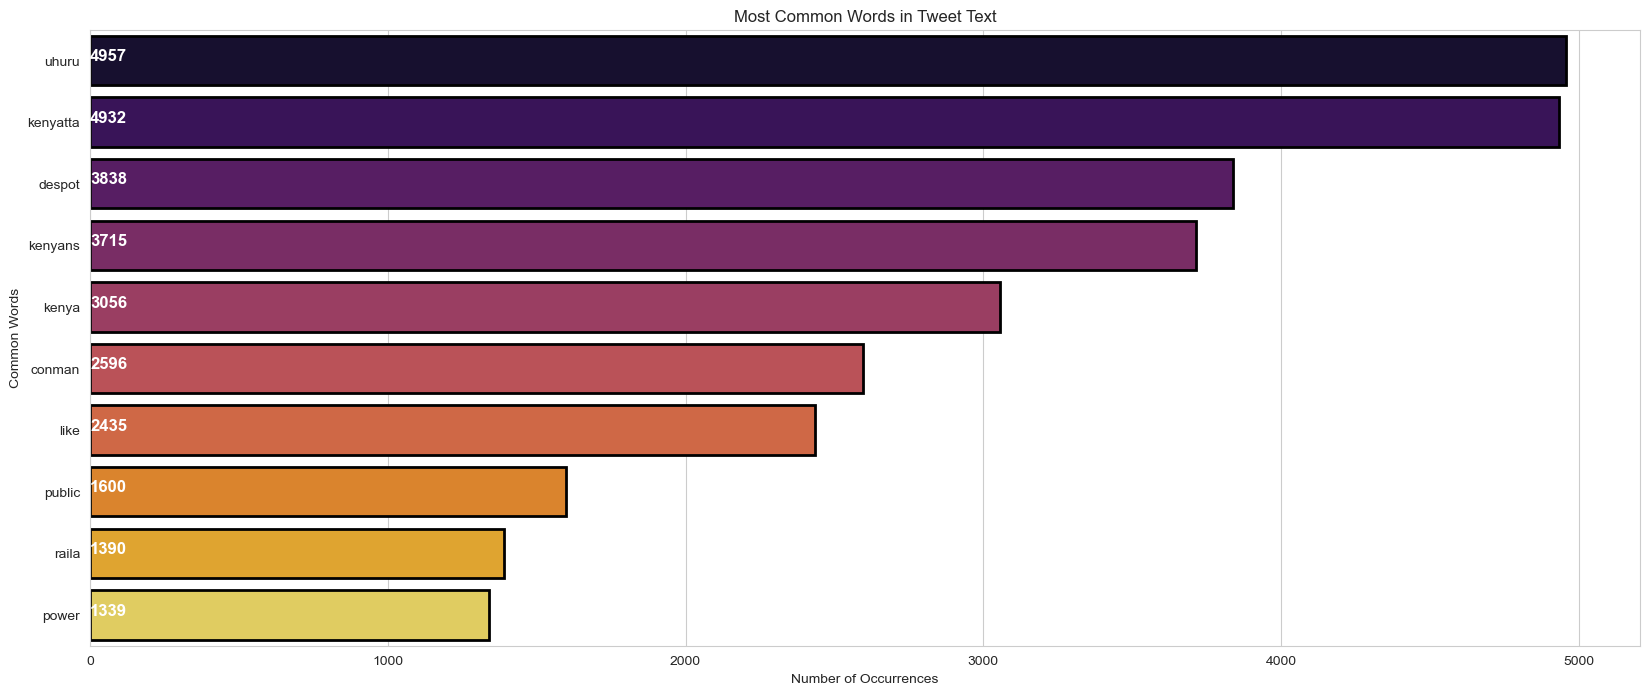

In [57]:
# plot top 20 most frequent words using seaborn.
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
ax = sns.barplot(x="count",y="Common_words", data=temp, palette="inferno", linewidth=2,edgecolor='black')
plt.title("Most Common Words in Tweet Text")
plt.xlabel("Number of Occurrences")
plt.ylabel("Common Words")

# Addd annotaions for the barplots.
for i,j in enumerate(temp["count"]):
    ax.text(.7,i,j,weight="bold",color="white",fontsize=12)

plt.show()

## <b>3.2 <span style='color:#F1A424'>|</span> Character Count by Tweet</b>

In [58]:
def _get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)

count    21365.000000
mean       208.143459
std         92.711859
min          6.000000
25%        120.000000
50%        263.000000
75%        278.000000
max        509.000000
Name: tweet_len, dtype: float64

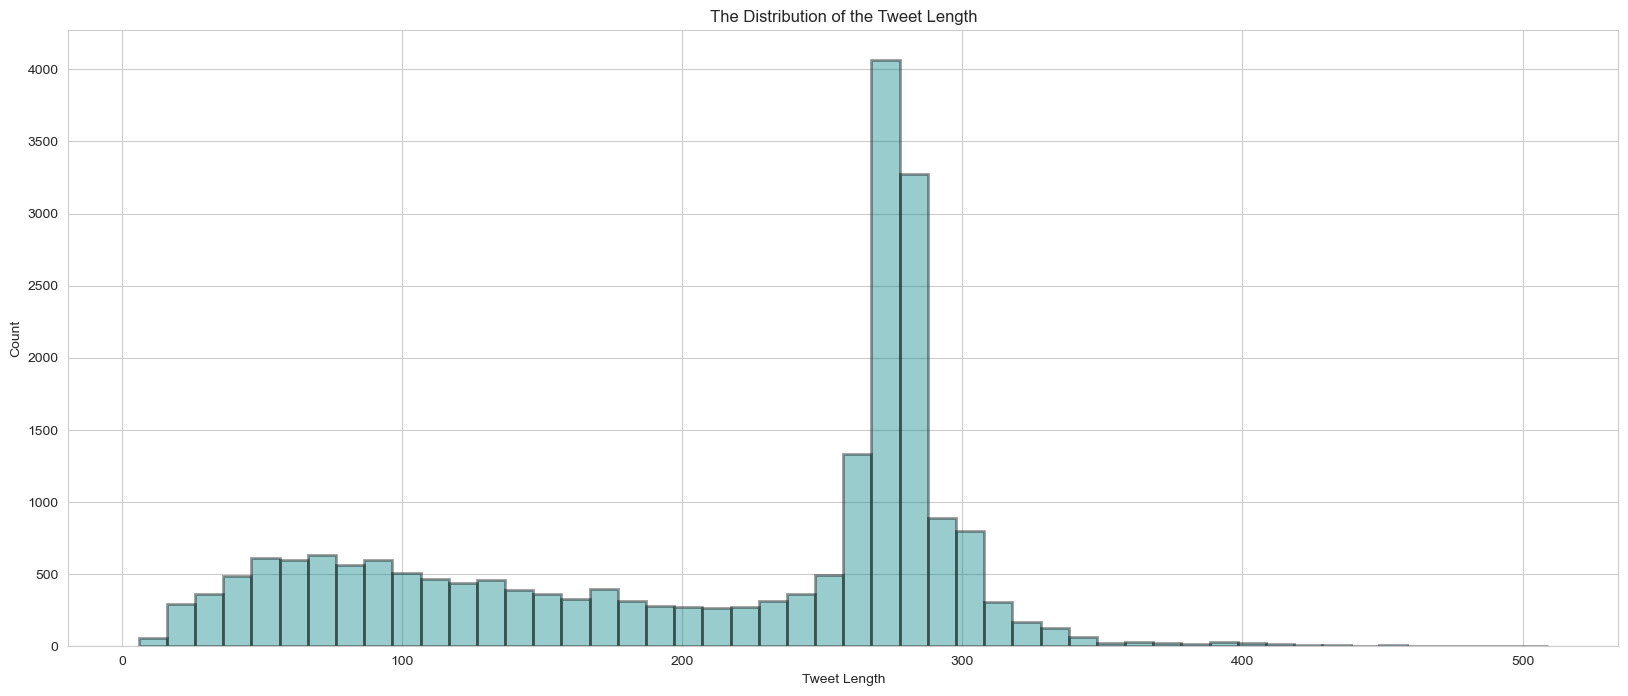

In [59]:
# get the character length for each tweet
df['tweet_len'] = df['tweet'].apply(lambda x:len(x))

display(df['tweet_len'].describe())

# plot the distribution of the tweet length
plt.figure(figsize=(20,8))
sns.distplot(df['tweet_len'], color='teal',kde=False, hist_kws=dict(edgecolor="black", linewidth=2), bins=50)
plt.title('The Distribution of the Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Count')

plt.show()

- **`Tweet Length Distribution:` The image shows the frequency of different tweet lengths in a sample of tweets. The most common tweet length is around 250 - 280 characters, which is close to the maximum limit of 280 characters. This suggests that the user (Dr. Miguna Miguna) tries to utilize the available space as much as possible when tweeting.**

## <b>3.3 <span style='color:#F1A424'>|</span> Word Count by Tweet</b>

preprocessed_tweet  \
12752                                                                                                           hypnotized inept zombie patriot vision integrity   
3294                                                                                                                                               5star general   
6279                                                                                                                                                    nonsense   
10865                                                                         despotic thumbsuckers understand chief dehumanize extent believe rights privileges   
17183  dreaming lock despots servers colonized despots raila publicly endorse aim steal elections remotely odm nasa buried march 2018 rao win byelections nyanza   

       word_counts  
12752            6  
3294             2  
6279             1  
10865            9  
17183           22

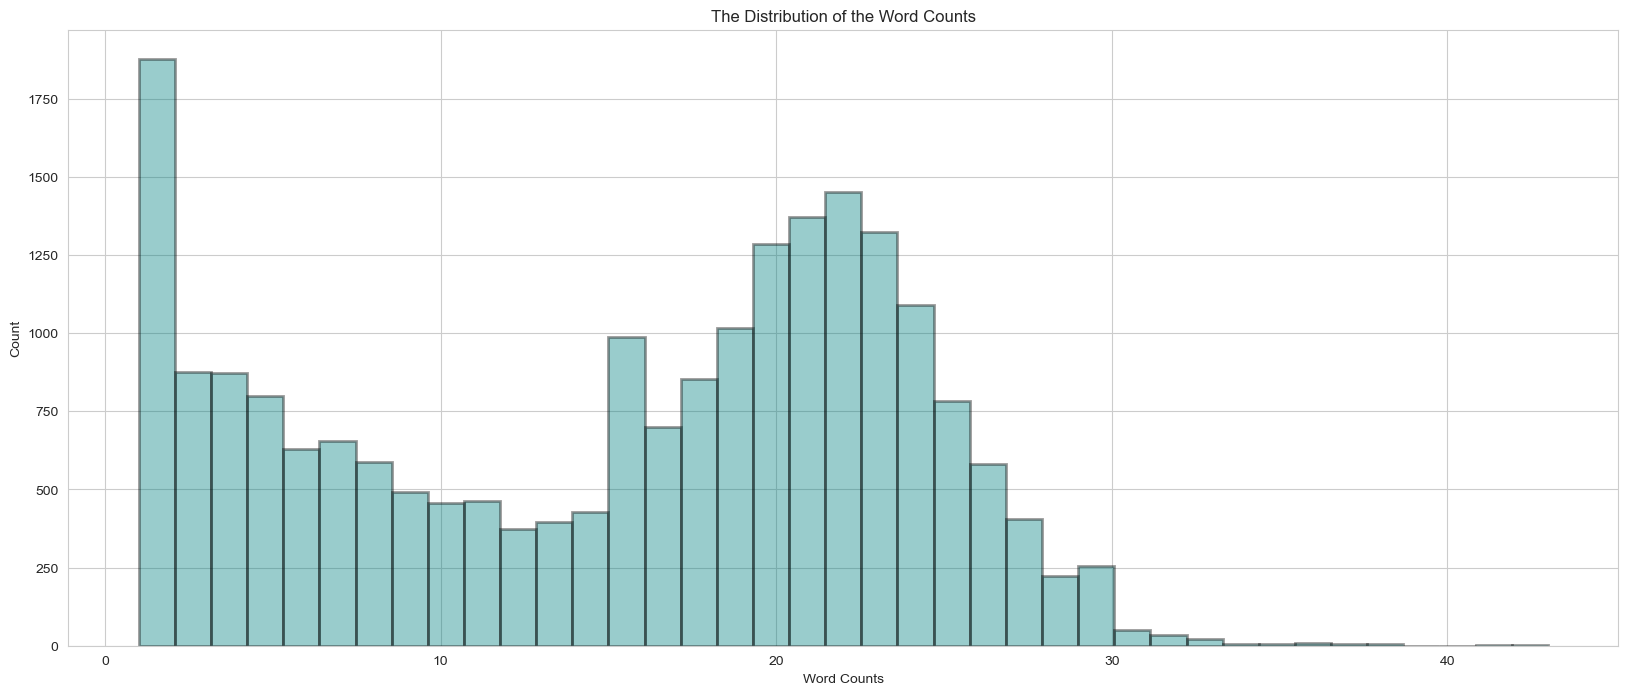

In [60]:
def _get_wordcounts(x):
	length = len(str(x).split())
	return length

df['word_counts'] = df['preprocessed_tweet'].apply(lambda x:_get_wordcounts(x))

display(df[['preprocessed_tweet','word_counts']].sample(5))

df['word_counts'].describe()

# plot word_counts
plt.figure(figsize=(20,8))
sns.distplot(df['word_counts'], color='teal', kde=False, hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('The Distribution of the Word Counts')
plt.xlabel('Word Counts')
plt.ylabel('Count')


plt.show()

**The histogram shows that the most common word count is between 20 and 25. The distribution is skewed to the right, meaning that there are more tweets with lower word counts than higher word counts. The lowest word count is between 1 and 5.**

## <b>3.4 <span style='color:#F1A424'>|</span> Character Count by Sentiment</b>

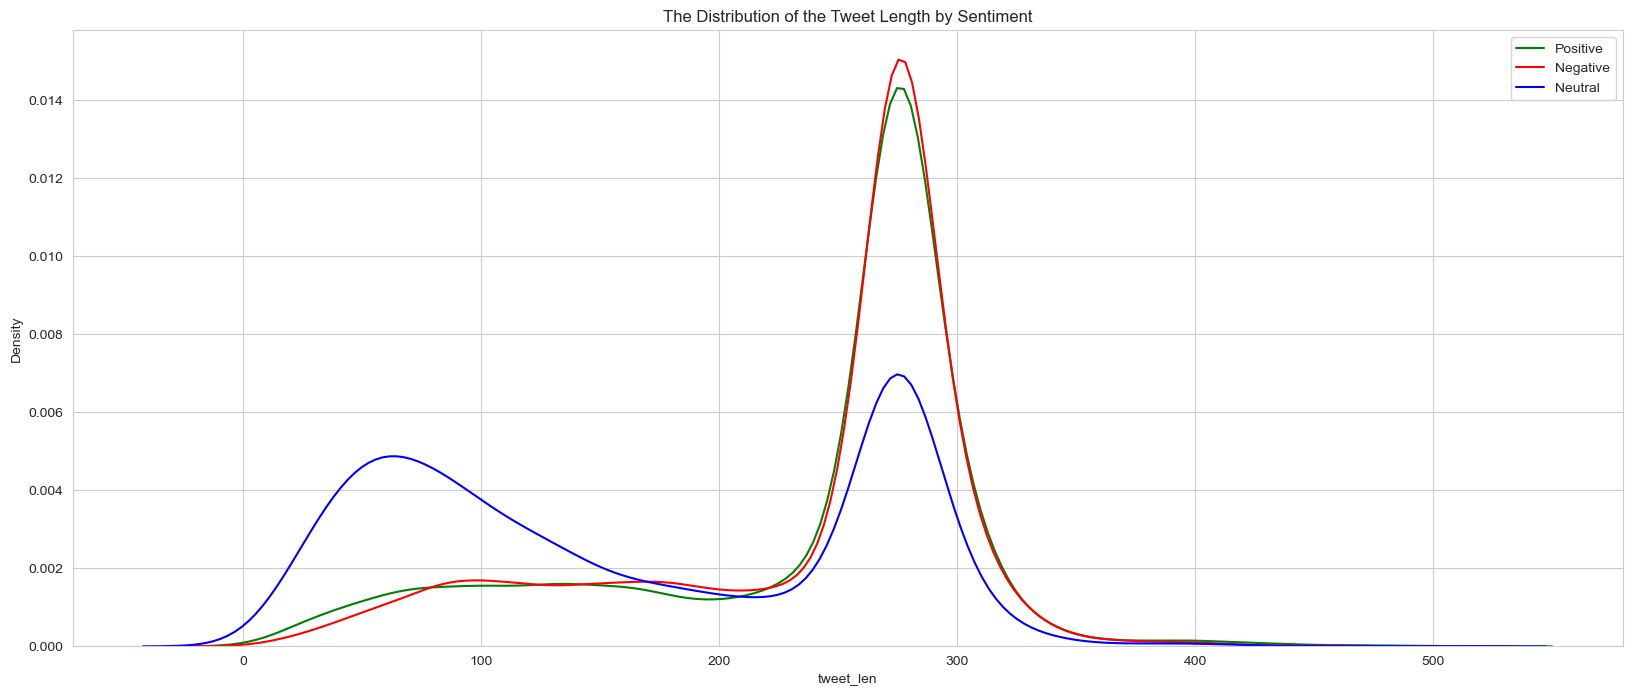

In [61]:
# Character Count by Sentiment
plt.figure(figsize=(20, 8))
sns.kdeplot(df[df['sentiment'] == 'Positive']['tweet_len'], color='green', label='Positive', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Negative']['tweet_len'], color='red', label='Negative', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Neutral']['tweet_len'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Tweet Length by Sentiment')
plt.legend()

plt.show()

- **The graph shows that most tweets are between 200 and 250 characters long, regardless of their sentiment. This is probably because Twitter has a limit of 280 characters per tweet.**

- **The graph also shows that positive and negative tweets have a higher density than neutral tweets around the peak of 200-250 characters. This means that there are more positive and negative tweets of that length than nuetral tweets. This could suggest that the user (Dr. Miguna Miguna) tends to express more positive or negative emotions in longer tweets, or that negative and positive emotions require more words to convey.**

## <b>3.5 <span style='color:#F1A424'>|</span> Word Count by Sentiment</b>

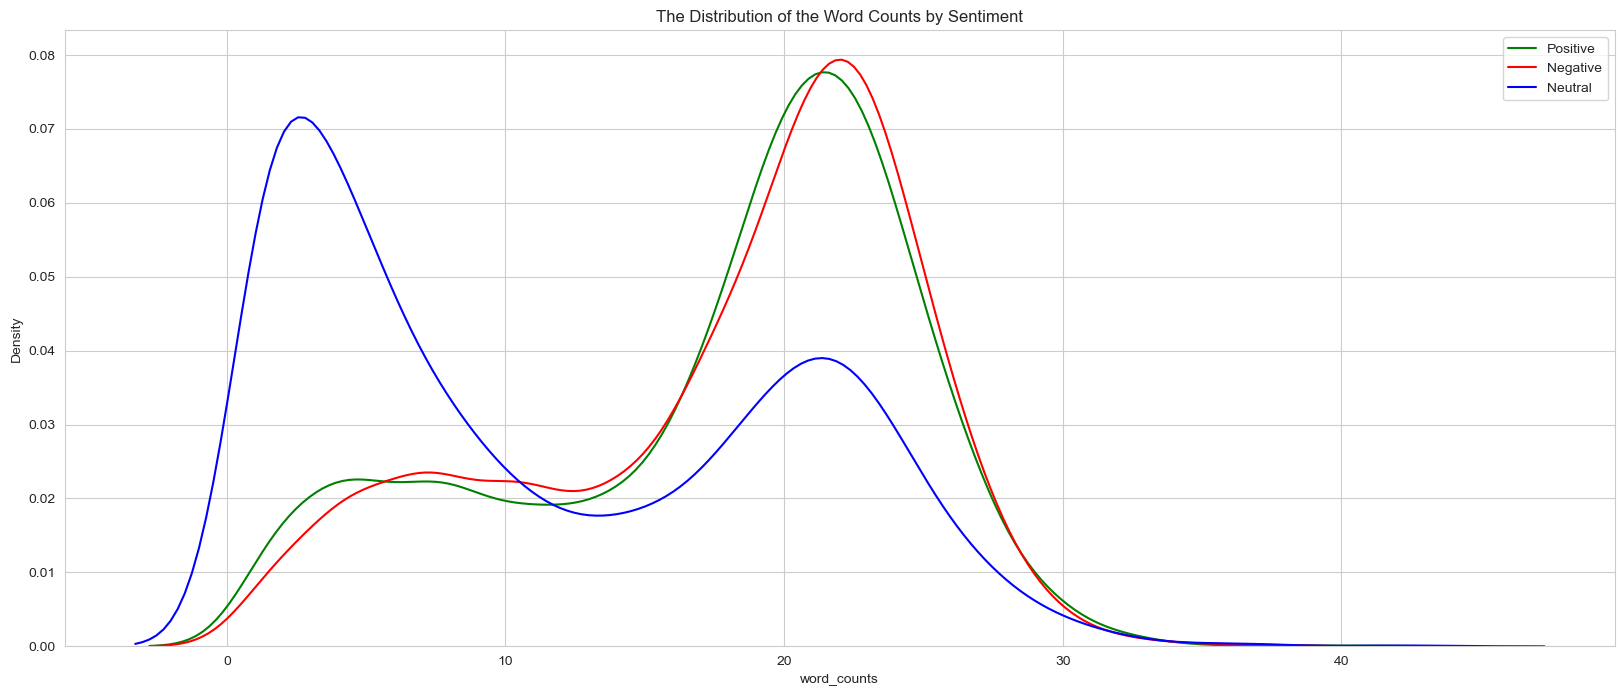

In [62]:
# word_count by sentiment type
plt.figure(figsize=(20, 8))
sns.kdeplot(df[df['sentiment'] == 'Positive']['word_counts'], color='green', label='Positive', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Negative']['word_counts'], color='red', label='Negative', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Neutral']['word_counts'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Word Counts by Sentiment')
plt.legend()

plt.show()

- **Positive and negative sentiment have similar word counts: The red and green lines, which represent positive and negative sentiment respectively, have similar shapes and peaks, indicating that the word counts for these two sentiments are not very different. This suggests that the length of the text does not affect the polarity of the sentiment much.**

- **Neutral sentiment has lower word counts: The blue line, which represents neutral sentiment, has a different shape and peak from the red and geen lines, indicating that the word counts for this sentiment are lower on average. This suggests that the texts with neutral sentiment tend to be sorter and more less descriptive than the texts with positive or negative sentiment.**

- **Most tweets have 20-30 words: The graph shows that the density of word counts is highest between 20 and 30 words, meaning that most of the texts have this range of word counts. This suggests that the texts are relatively short and concise, and do not contain too much information or details.**

## <b>3.6 <span style='color:#F1A424'>|</span> Average Word Length by Tweet</b>

clean_tweet  \
14717                                                                                                                                                                            false learn think   
19886  luos government tuju portfolio omamo eating dregs military generals magoha taken seat powerful posts president chief staff principal secretaries mds ceos executive chairpersons etc kikuyu   
12370                                                                                                                                                                            primitive opinion   
11267                                                                                  innocent people die everyday chris msando baby pendo moraa etc worry dying jail stop sympathizing criminals   
1838                      2020 donald trumps republicans members congress democrats biden 2020 presidential election cautioning conman cows stop usual premature celebrations learn 2007 2013 2017   

       avg_wordlength  
14717        6.166667  
19886        5.565217  
12370        7.833333  
11267        5.680000  
1838         5.842105

count    21365.000000
mean         5.868084
std          1.280227
min          3.000000
25%          5.115385
50%          5.571429
75%          6.185185
max         20.000000
Name: avg_wordlength, dtype: float64

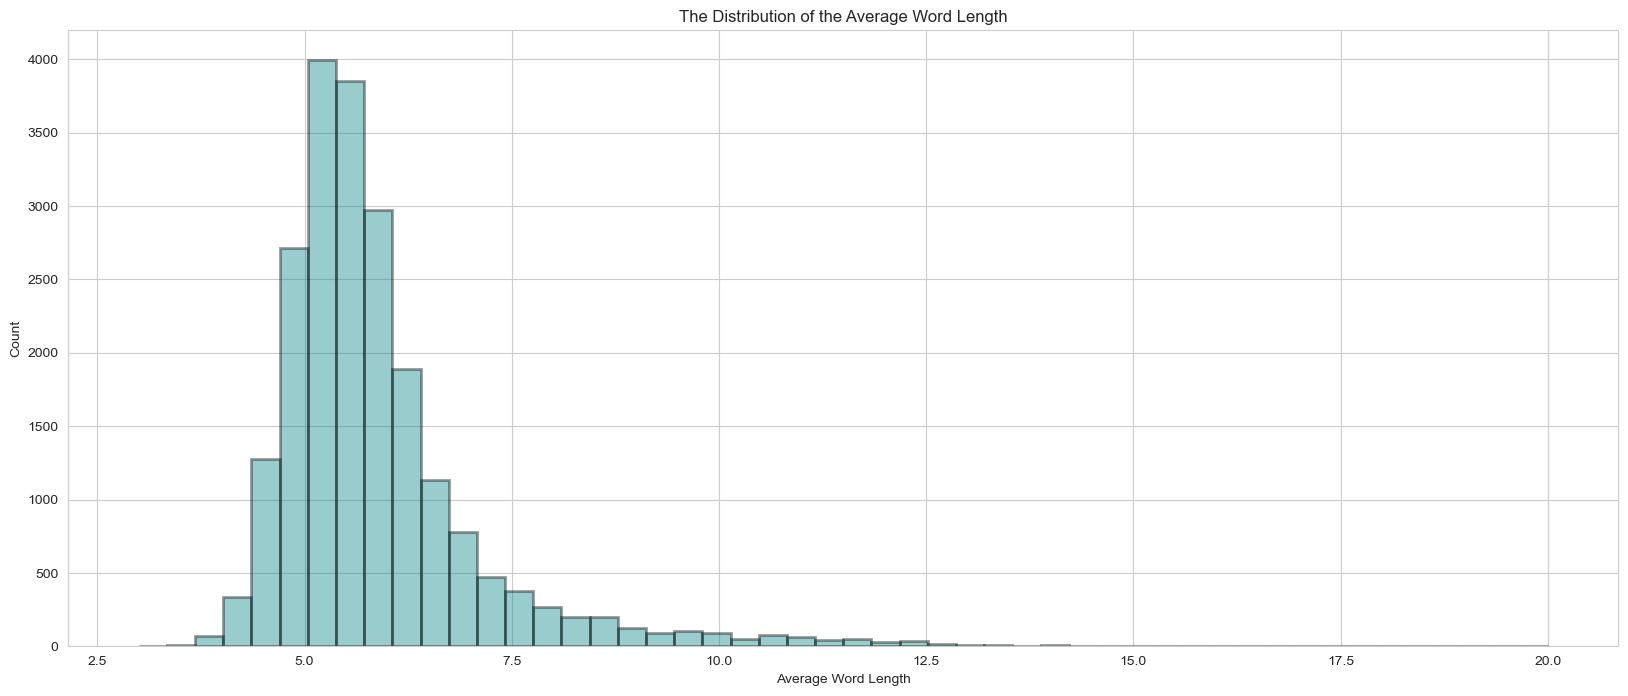

In [63]:
# get avaerage word length
def _get_avg_wordlength(x):
	count = _get_charcounts(x)/_get_wordcounts(x)
	return count

df['avg_wordlength'] = df['tweet'].apply(lambda x:_get_avg_wordlength(x))

display(df[['clean_tweet','avg_wordlength']].sample(5))

display(df['avg_wordlength'].describe())

# plot avg_wordlength
plt.figure(figsize=(20,8))
sns.distplot(df['avg_wordlength'], color='teal', kde=False, hist_kws=dict(edgecolor="black", linewidth=2), bins=50)
plt.title('The Distribution of the Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Count')


plt.show()

**The data distribution in the histogram shows that the majority of the average word lengths are between 5 and 8, with a peak around 7. This means that most of the tweets have words that are 5 to 10 letters long, and the most common average word length is 7. There is a sharp drop off in the frequency of average word lengths after 10, which means that tweets with longer words are rare.**

## <b>3.7 <span style='color:#F1A424'>|</span> Average Word Length by Sentiment</b>

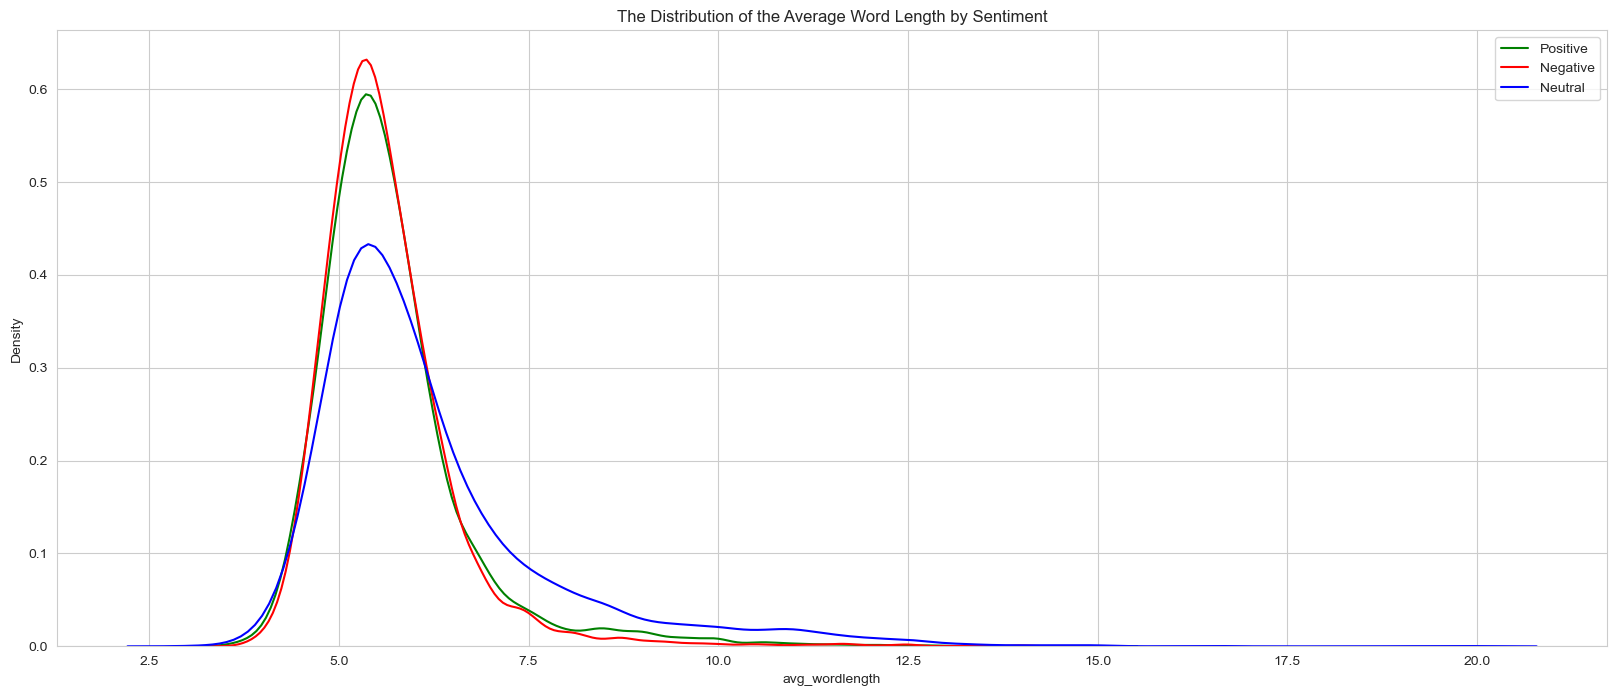

In [64]:
# plot the average word length by sentiment type
plt.figure(figsize=(20, 8))
sns.kdeplot(df[df['sentiment'] == 'Positive']['avg_wordlength'], color='green', label='Positive', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Negative']['avg_wordlength'], color='red', label='Negative', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Neutral']['avg_wordlength'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Average Word Length by Sentiment')
plt.legend()

plt.show()


- **The sentiment lines tend to peak around 4-8 word length. This suggests that the majority of the tweets tend to have shorter words.**

- **The positive and Negative tweets almost have the same distribution. This suggests that the average word length does not affect the polarity of the sentiment much.**

## <b>3.8 <span style='color:#F1A424'>|</span> Sentiment Analysis</b>

### <b>3.8.0 <span style='color:#F1A424'>|</span> Distribution of Sentiments</b>

In [65]:
df['sentiment'].value_counts()

sentiment
Neutral     8561
Positive    6472
Negative    6332
Name: count, dtype: int64

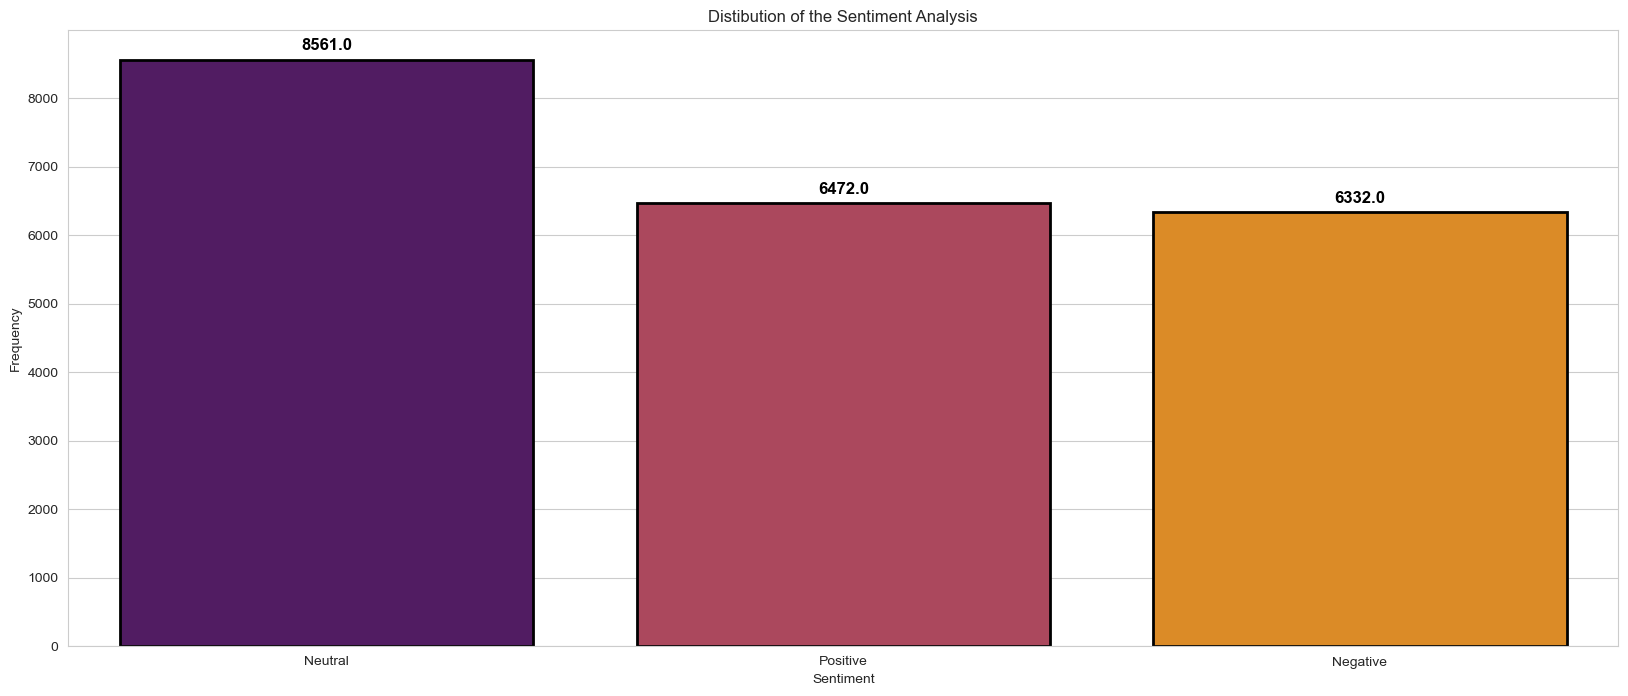

In [66]:
plt.figure(figsize=(20,8))     #width and height
sns.countplot(x='sentiment',data=df, palette = 'inferno', linewidth=2, edgecolor='black')
plt.title("Distibution of the Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Add annotations to plot
for p in plt.gca().patches:
    plt.gca().annotate(p.get_height(), 
                       (p.get_x()+p.get_width()/2., 
                        p.get_height()), ha='center', 
                        va='center', xytext=(0, 10), 
                        textcoords='offset points', 
                        fontsize=12, color='black',
                          weight='bold')


plt.show()

In [67]:
# Funnel-Chart of Sentiment Distribution
# Create a list of the sentiment types
sentiment_list = ['Positive', 'Negative', 'Neutral']

# Create a list of the count of each sentiment type
sentiment_count = [df['sentiment'].value_counts()[i] for i in range(len(sentiment_list))]
sentiment_count

# Create a funnel chart
fig = go.Figure(go.Funnel(
    y = sentiment_list,
    x = sentiment_count,
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.7
))

# Add custom color scheme
fig.update_traces(marker={"color": ["teal", "yellow", "red"]})

# Update layout
fig.update_layout(
    title={
        'text': "Sentiment Distribution",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Arial",
        size=18,
        color="#4f5b66"),
    plot_bgcolor="#f9f9f9",
    paper_bgcolor="#f9f9f9",
    width=1300, 
    height=500
)

# Add images  
fig.add_layout_image(
    dict(
        source="https://imgs.xkcd.com/comics/python_environment.png",
        xref="paper", yref="paper",
        x=1, y=0.5,
        sizex=0.2, sizey=0.2,
        opacity=0.7
    )
)

# Show figure
fig.show()

**The graph shows that the most frequent sentiment among the data is neutral, followed by positive and negative. This suggests that the data is balanced and diverse in terms of opinions and emotions.**

### <b>3.8.1 <span style='color:#F1A424'>|</span> Positive Sentiment Analysis</b>

In [68]:
# Most common positive words
df_pos = df[df['sentiment'] == 'Positive']
top = Counter([item for sublist in df_pos['tweet_temp'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

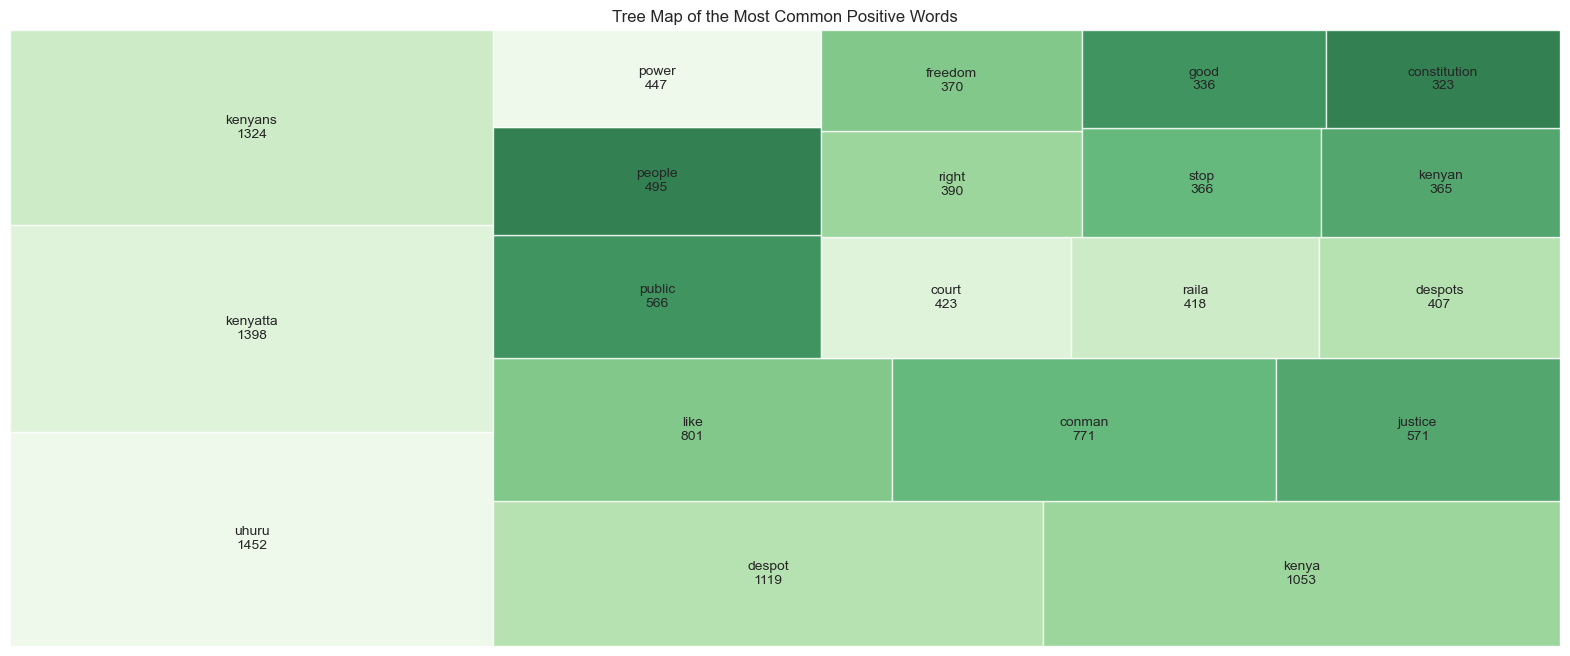

In [69]:
plt.figure(figsize=(20,8))

# Create labels with word counts
labels = [f"{word}\n{count}" for word, count in zip(temp_positive['Common_words'], temp_positive['count'])]

squarify.plot(sizes=temp_positive['count'], label=labels, alpha=0.8, color=sns.color_palette("Greens", 10), text_kwargs={'fontsize':10})

plt.title('Tree Map of the Most Common Positive Words')
plt.axis('off')

plt.show()

In [70]:
# Getting the most positive tweets

j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
positive_tweets = []  # list to store positive tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Positive'):
    positive_tweets.append(sortedDF['tweet'][i])
    j = j+1

# Convert list to DataFrame
positive_tweets_df = pd.DataFrame(positive_tweets, columns=['Positive Tweets'])

positive_tweets_df

Positive Tweets
0                                                                 The "best" MC Despot Kenyatta and Con-Man @RailaOdinga could find for a glorified fraud at the Bomas of Kenya was a councillor from Migori and the customary inheritor of Fidel's wife called Miss Junet Mohamed. They couldn't even find a 5th-grade constitutional student to do that.
1                                                                                                                                                                                                                                                                                       Excellent. Keep exposing the Fat Toad from Buffalo, @makaumutua. 👊
2                                                                                                                                                           @_byron99 Then organize yourselves and remove him from power. Expose him as a traitor - with facts. I'm not Ethiopian, so I cannot claim to know the details of your assertions. Best of luck.
3                                                                           Congratulations, my friend @BobRae48, for your appointment as Canada's ambassador to the @UN. I still remember our first meeting at the @UofT - me as a newly-arrived refugee and an undergraduate student and you as a candidate for the leadership of the NDP. Best of luck.
4                                                                                                                                                                                                 SANKOFA (1993), the best movie I've ever watched, By Haile Gerima. Directed by Aboubakar Sanogo. @KmmLawyers @CourtneyKazembe    https://t.co/sbGarfKt41
...                                                                                                                                                                                                                                                                                                                                                    ...
6467                                                                                                                                                                                                           I said it is a PATHOLOGICAL MENTAL CONDITION and stated the solution. But you - like many others - don't read and clearly refuse to DIGEST.
6468                                                                                        @d3vwise @DCI_Kenya @FerdinandOgumah Then keep me alive. Start doing that by refraining from posting such messages publicly on Twitter. Use your common sense. You have access to my DM, email and phone. Exercise DISCIPLINE. And please don't reply. Thanks.
6469                                                                                                                                                                     This is what @UKenyatta planned with his #HudumaNamba! He wants to monitor the movement of all Kenyans in preparation for complete military and police control. We say a firm NO!
6470                                              @NationBreaking Let me ask Naushad Merali - a notorious Moi era thief - why he paid the fake Uhuru Shs. 7,000,000? Fake or genuine, why did he pay? To curry favour? It's people like Merali who should be jailed for 50 years for looting Kenya and turning innocent young men now charged into con-men
6471  @KevinLanyo @WilliamsRuto @DCI_Kenya @ODPP_KE @OleItumbi @FBI That's not the law. The law is that once a reasonable and probable ground exists that a crime has been committed, law enforcement agents are required not just to investigate but to arrest the alleged perpetrators. Police does not require "complaints" to arrest or charge anyone.

[6472 rows x 1 columns]

#### <b>3.8.1.2 <span style='color:#F1A424'>|</span> Most Unique Postive Words</b>

In [71]:
raw_text = [word for word_list in df['tweet_temp'] for word in word_list]

def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in df[df.sentiment != sentiment]['tweet_temp']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()

    for item in df[df.sentiment == sentiment]['tweet_temp']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words


In [72]:
Unique_Positive= words_unique('Positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


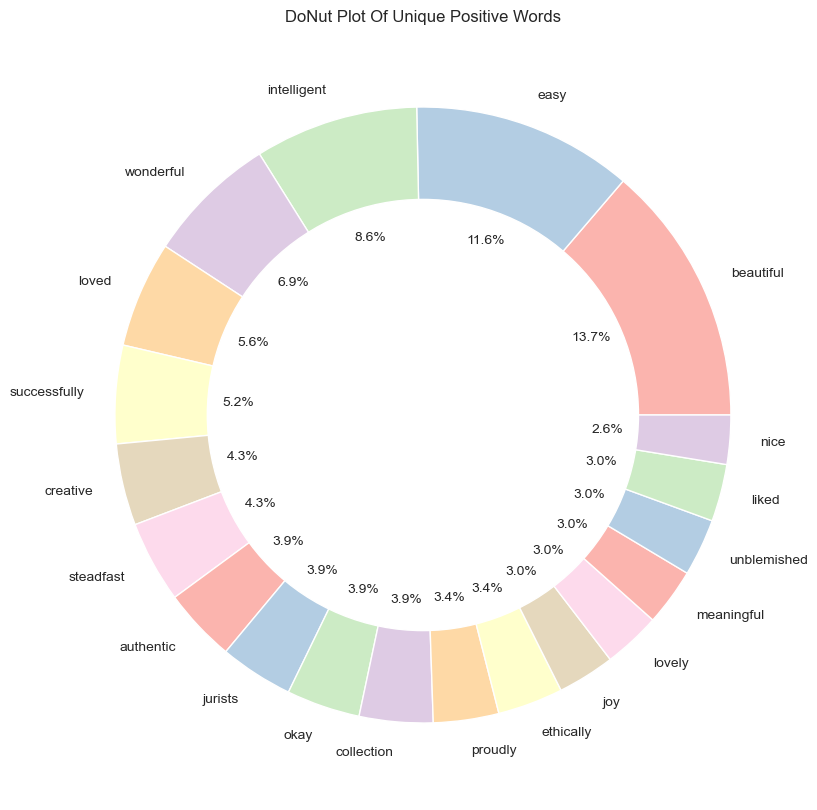

In [73]:
from palettable.colorbrewer.qualitative import Pastel1_8
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_8.hex_colors, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

### <b>3.8.2 <span style='color:#F1A424'>|</span> Negative Sentiment Analysis</b>

In [74]:
# Most Common Negative Words
df_neg = df[df['sentiment'] == 'Negative']
top = Counter([item for sublist in df_neg['tweet_temp'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(10))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

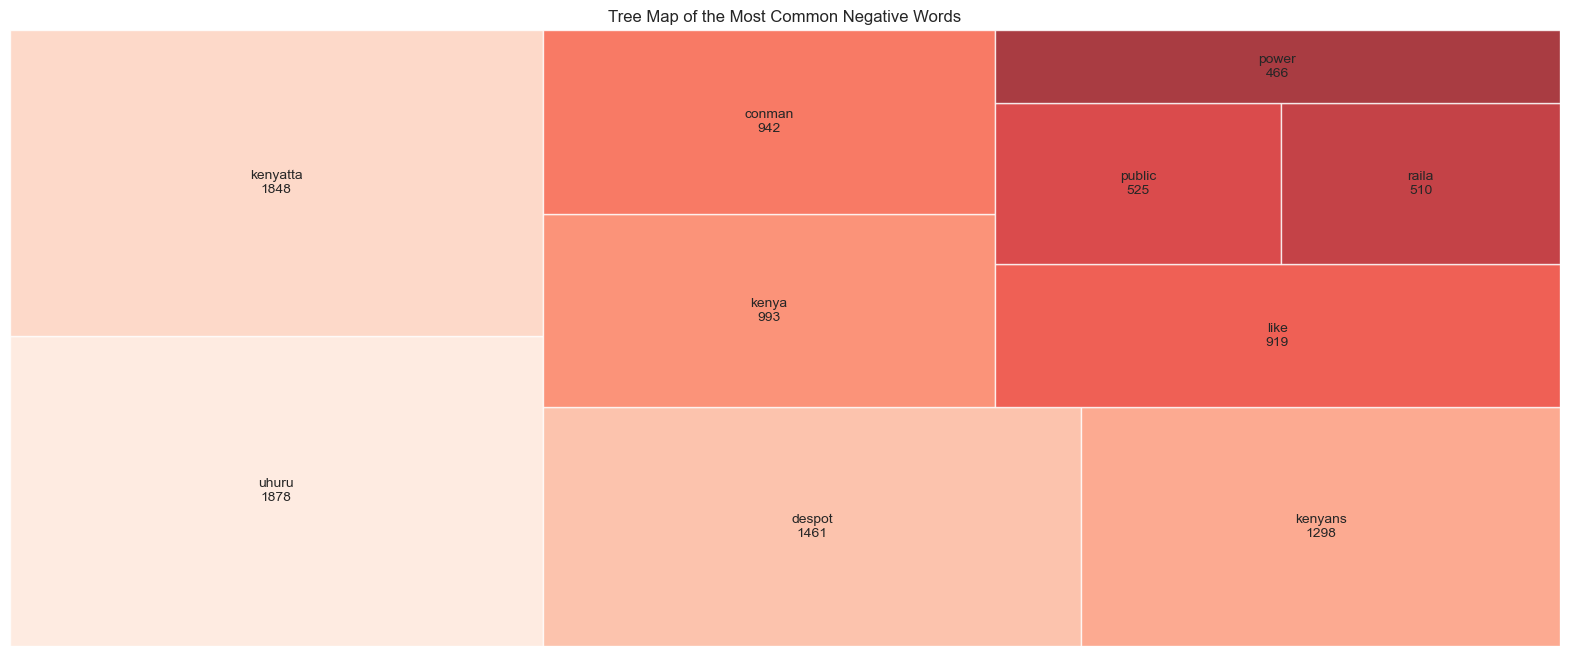

In [75]:
# plot a tree map
plt.figure(figsize=(20,8))

# Create labels with word counts
labels = [f"{word}\n{count}" for word, count in zip(temp_negative['Common_words'], temp_negative['count'])]

squarify.plot(sizes=temp_negative['count'], label=labels, alpha=0.8, color=sns.color_palette("Reds", 10), text_kwargs={'fontsize':10})

plt.title('Tree Map of the Most Common Negative Words')
plt.axis('off')

plt.show()

#### <b>3.8.2.1 <span style='color:#F1A424'>|</span> Most Negative Tweets</b>

In [76]:
# Getting the most negative tweets

j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
negative_tweets = []  # list to store negative tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Negative'):
    negative_tweets.append(sortedDF['clean_tweet'][i])
    j = j+1

# Convert list to DataFrame
negative_tweets_df = pd.DataFrame(negative_tweets, columns=['Negative Tweets'])

negative_tweets_df

Negative Tweets
0                                                mr wants debate man open mouth utter coherent sentence man relies 100 fake media propaganda nis schemes jimi pity conman project fellow billionaires
1              kenyan media guilty campaigning nairobi ferdinand waititu kiambu leading editors ended despot uhuru kenyattas sonkos cabinets rewards effective propaganda progressive candidates like
2                                                                                                     false elections credible genuinely independent yes things different stop repeating despotic lie
3          socrates athenian father democracy conducted public intellectual brawls decades tyrants forced drink hemlock public policy debates conducted way beginning time write books read libraries
4                                                                                                       false parents raised fed took helb loans repaid gave free open clogged eyes rid cowardice act
...                                                                                                                                                                                               ...
6327                                    despot uhuru kenyatta piglets like bomb houses torture threaten intimidate history teaches end fall like abacha end miserable unremarkable struggle continues
6328                                                                              peace man stolen elections guns looted money hand guns relying money election thief given peace leverage cruel hoax
6329  president stop writing letters despot uhuru kenyatta goons like kihara kariuki gown organize members march like gallant pakistani lawyers removed stronger vicious tyrant like pervez musharraf
6330                                                                                                                 3 sides contest 1 truth honesty justice 2 lies evil status quo et al 3 cowardice
6331                                                                                                           despot uhuru kenyatta conman worst pandemics kenya kenyans find cure permanent vaccine

[6332 rows x 1 columns]

#### <b>3.8.2.2 <span style='color:#F1A424'>|</span> Most Unique Negative Words</b>

In [77]:
# most unique negative words
Unique_Negative= words_unique('Negative', 20, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 20 unique words in Negative Tweets are:


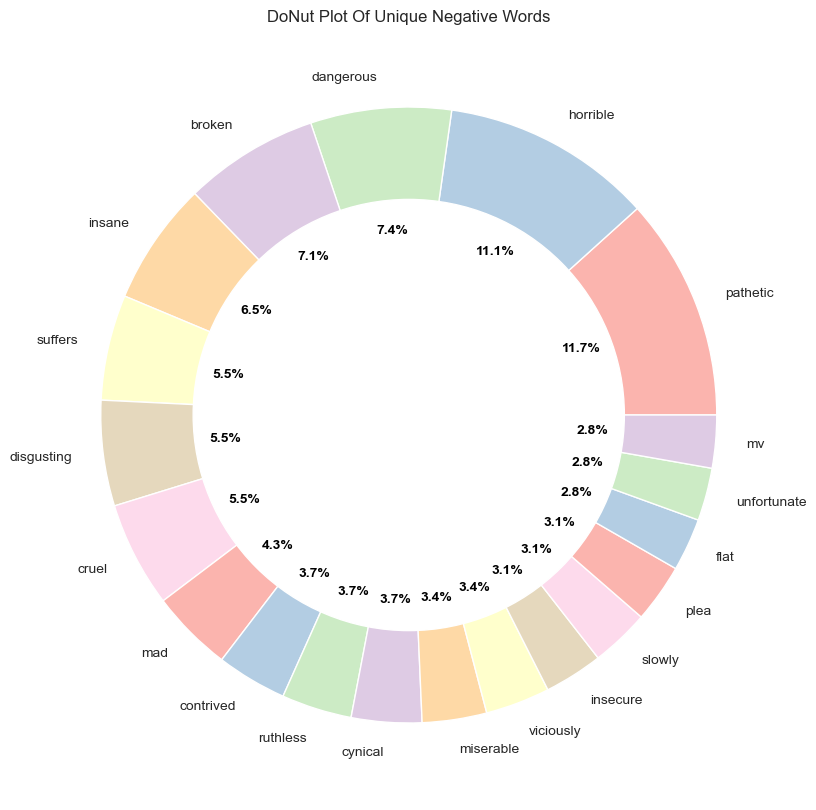

In [78]:
# DoNut Plot Of Unique Negative Words
from palettable.colorbrewer.qualitative import Pastel1_8

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')

# Calculate percentages
total = sum(Unique_Negative['count'])
percentages = [100*(i/total) for i in Unique_Negative['count']]

wedges, texts, autotexts = plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_8.hex_colors, autopct='%1.1f%%')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')

# Update autotexts' properties
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')
    autotext.set_weight('bold')

plt.show()

### <b>3.8.3 <span style='color:#F1A424'>|</span> Neutral Sentiment Analysis</b>

In [79]:
# Most Common Neutral Words
df_neu = df[df['sentiment'] == 'Neutral']
top = Counter([item for sublist in df_neu['tweet_temp'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(10))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Blues')


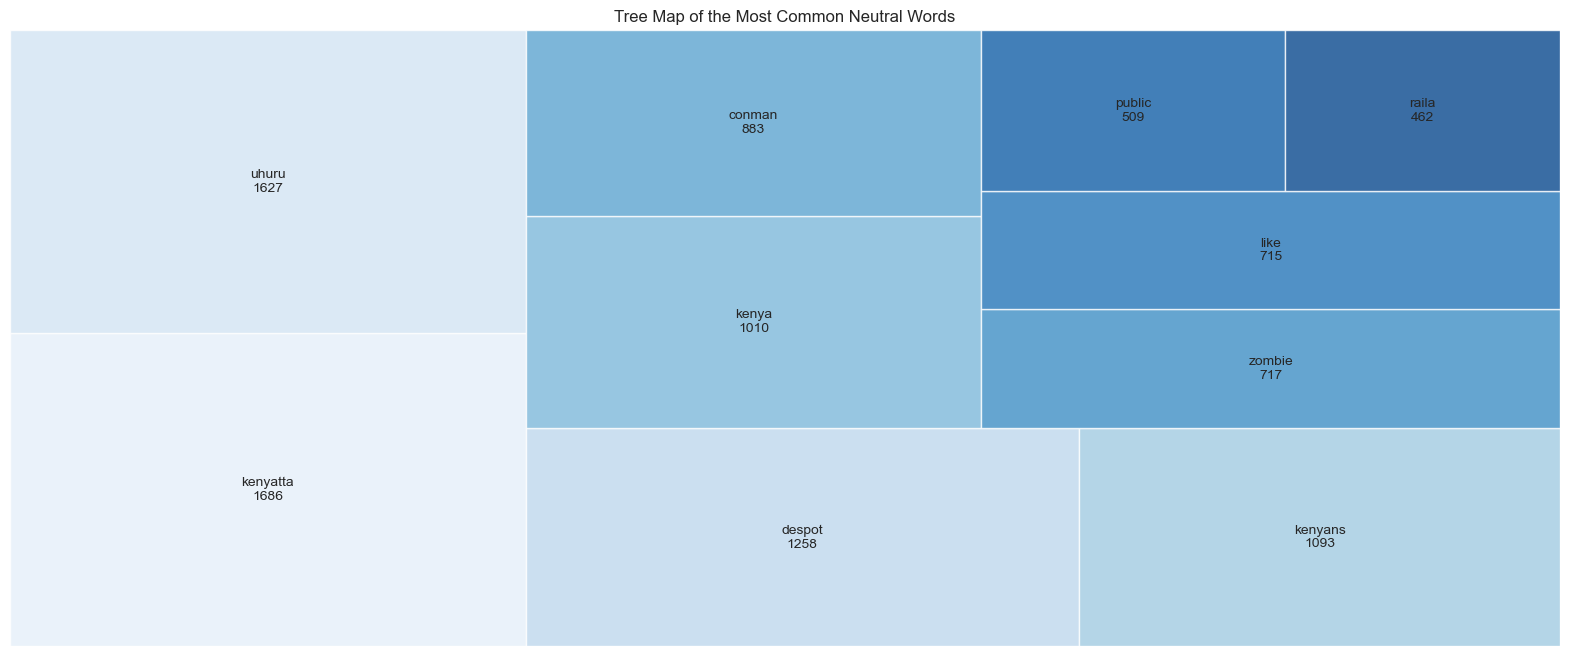

In [80]:
# plot a tree map 
plt.figure(figsize=(20,8))

# Create labels with word counts
labels = [f"{word}\n{count}" for word, count in zip(temp_neutral['Common_words'], temp_neutral['count'])]

squarify.plot(sizes=temp_neutral['count'], label=labels, alpha=0.8, color=sns.color_palette("Blues", 10), text_kwargs={'fontsize':10})

plt.title('Tree Map of the Most Common Neutral Words')
plt.axis('off')

plt.show()

#### <b>3.8.3.1 <span style='color:#F1A424'>|</span> Most Neutral Tweets</b>

In [81]:
# Getting the most neutral tweets

j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
neutral_tweets = []  # list to store neutral tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Neutral'):
    neutral_tweets.append(sortedDF['clean_tweet'][i])
    j = j+1

# Convert list to DataFrame
neutral_tweets_df = pd.DataFrame(neutral_tweets, columns=['Neutral Tweets'])

neutral_tweets_df

Neutral Tweets
0                                                                                 told cartels nairobi county debate july 10 2017 dayster university evans kidero mike sonko peter kenneth looter despot kenyatta
1                  governor oparanya council looters told despot muigai kenyatta power constitutional responsibility counties power allocate resources power decide kenyans choose governors respect constitution
2                                                                                                                                                 despots 30 years ago join join 2017 2018 stop distractions told
3                                                                                                                                                                               swearing cat crime kenyans zombie
4                                                                                                                                                                   winston churchill drunkard drug addict zombie
...                                                                                                                                                                                                           ...
8556  banana republic distinguished professors law human rights gurus ensconced universities renowned advocates journalists geckos yelling years respect despots conmen disobey court orders subvert constitution
8557                                                                                                                                                                                              house corporals
8558                                 ledama olekina diapers kenya parrots louder melodious sing nutritious sycophancy dictator moi mulu mutisya kariuki chotara okiki amyayo oloo aringo 40 years later remembers
8559                                                                                                                                                                                      raila county government
8560                                                                                                                                                                                                        agree

[8561 rows x 1 columns]

#### <b>3.8.3.2 <span style='color:#F1A424'>|</span> Most Unique Neutral Words</b>

In [82]:
# most unique neutral words
Unique_Neutral= words_unique('Neutral', 20, raw_text)
print("The top 20 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Blues')

The top 20 unique words in Neutral Tweets are:


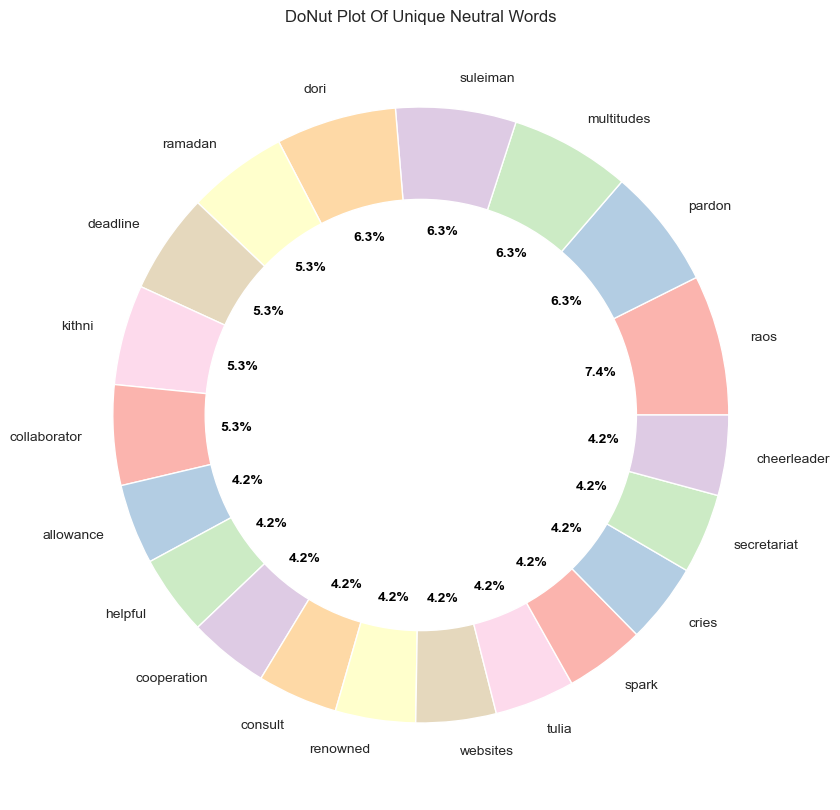

In [83]:
# DoNut Plot Of Unique Neutral Words
from palettable.colorbrewer.qualitative import Pastel1_8

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')

# Calculate percentages
total = sum(Unique_Neutral['count'])
percentages = [100*(i/total) for i in Unique_Neutral['count']]
wedges, texts, autotexts = plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_8.hex_colors, autopct='%1.1f%%')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')

# Update autotexts' properties
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')
    autotext.set_weight('bold')

plt.show()

**By Looking at the Unique Words of each sentiment,we now have much more clarity about the data,these unique words are very strong determiners of Sentiment of tweets**

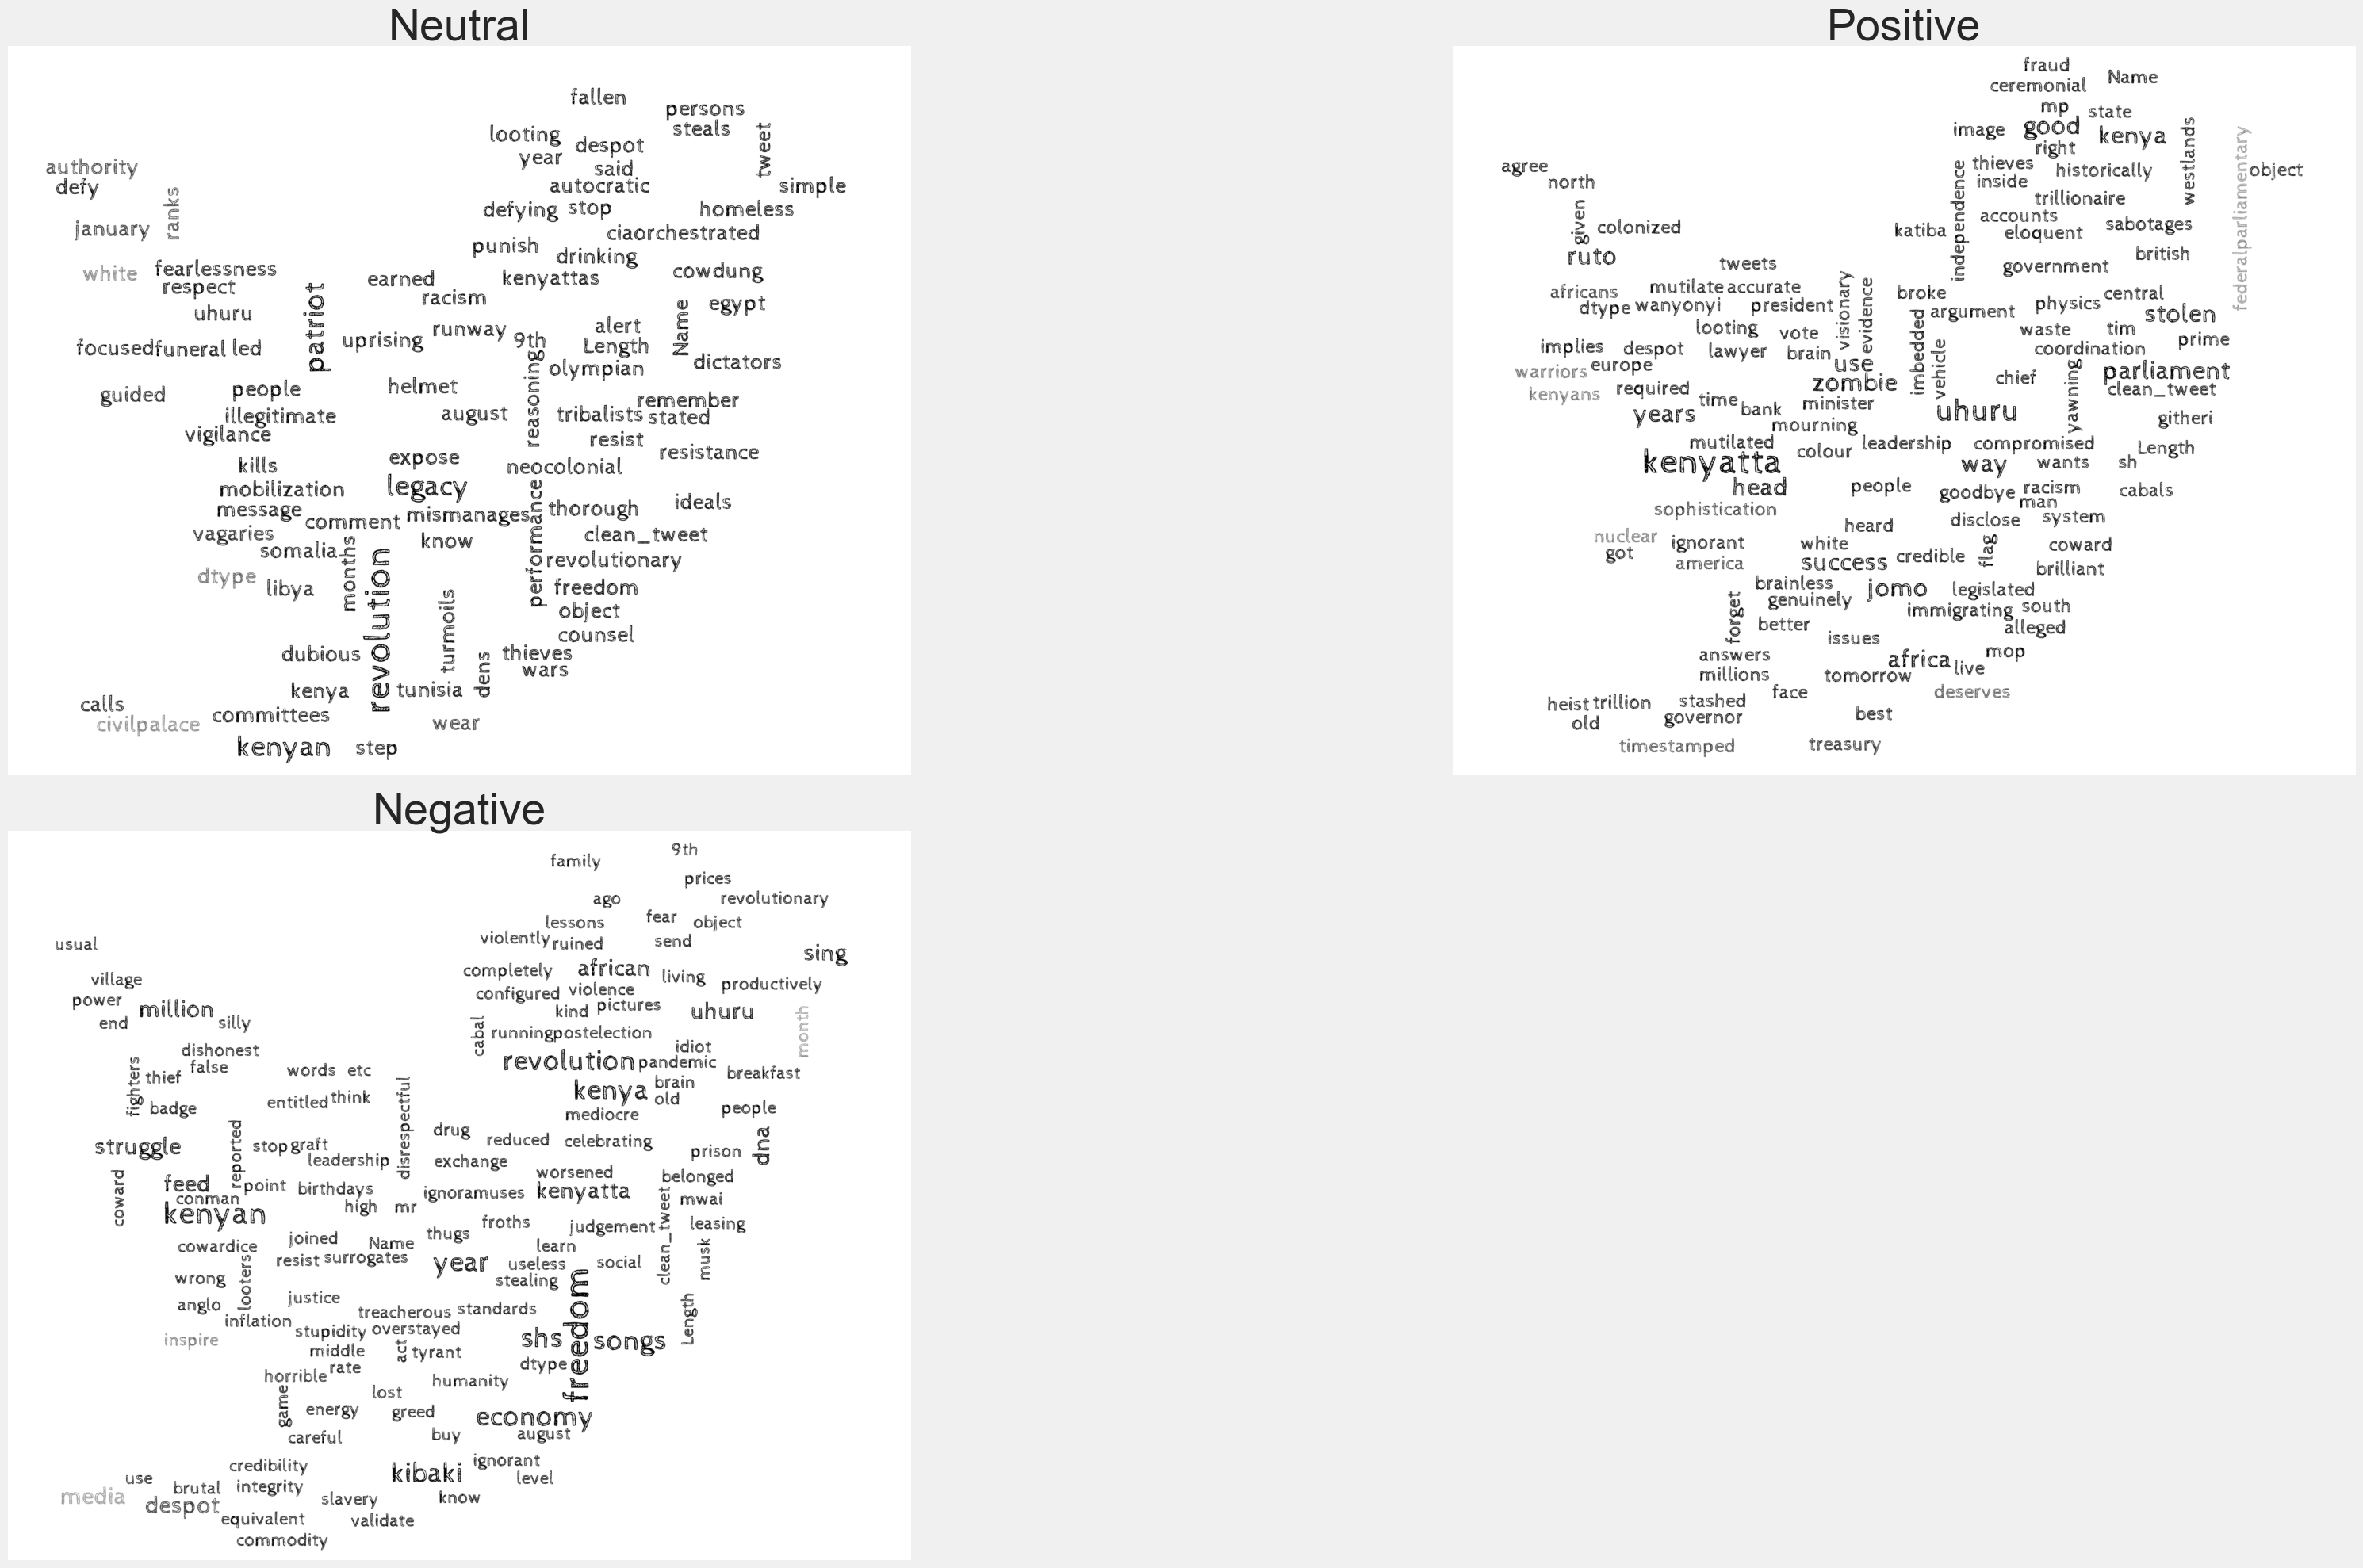

In [84]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
plt.style.use('fivethirtyeight')

# Generate a word cloud image
mask = np.array(Image.open(r"D:\Natural Language Processing\Phase 4 Project\images\twitter.png"))  # replace with your image file path
stopwords = set(STOPWORDS)

plt.figure(figsize = (40, 20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2, 2, index + 1)

    data = df[df['sentiment'] == sent]['clean_tweet']
    wordcloud_twitter = WordCloud(background_color='white',
                                  font_path=r'D:\Natural Language Processing\Phase 4 Project\fonts\Cabin_Sketch\CabinSketch-Regular.ttf',
                                  stopwords=stopwords,
                                  max_words=300,
                                  max_font_size=40,
                                  scale=5,
                                  mask=mask).generate(str(data))

    # Create coloring from the image
    image_colors = ImageColorGenerator(mask)
    plt.imshow(wordcloud_twitter.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis('off')
    plt.title(sent, fontsize=40)

# Store visualization to file
plt.savefig("twitter_logo.png", format="png")
plt.tight_layout()

plt.show()

In [85]:
# save the dataframe to csv using the name 'processed_data.csv'

# df = df[['clean_tweet', 'preprocessed_tweet', 'lemma_preprocessed_tweet', 'stemma_preprocessed_tweet', 'sentiment']]
# df.to_csv(r'D:\Natural Language Processing\Phase 4 Project\data\processed_data.csv', index=False)

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>4 |</span></span></b> Modelling</b></p></div>

**Involves creating a mathematical algorithm that can find patterns or make decisions from a previously unseen dataset4. The model is trained using data and can predict things before they happen.**

In [86]:
df = pd.read_csv(r'D:\Natural Language Processing\Phase 4 Project\data\processed_data.csv')

df.head()

clean_tweet  \
0  despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th   
1                                    president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like   
2                               alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion 9 years argument implies ruto trillionaire broke genuinely mourning   
3                                                                                                                                         credible evidence timestamped image inside vehicle   
4                                                                                                                                                                tweet white people homeless   

                                                                                                                                                                          preprocessed_tweet  \
0  despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th   
1                                    president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like   
2                                 alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion years argument implies ruto trillionaire broke genuinely mourning   
3                                                                                                                                         credible evidence timestamped image inside vehicle   
4                                                                                                                                                                tweet white people homeless   

                                                                                                                                                              lemma_preprocessed_tweet  \
0  despot uhuru kenyattas olympian performance drinking looting den funeral committee fallen thief tribalists dictator 10 year legacy kenyan remember punish dubious legacy august 9th   
1                                president lawyer agree issue best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warrior like   
2                            alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion year argument implies ruto trillionaire broke genuinely mourning   
3                                                                                                                                   credible evidence timestamped image inside vehicle   
4                                                                                                                                                          tweet white people homeless   

                                                                                                                                         stemma_preprocessed_tweet  \
0  despot uhuru kenyatta olympian perform drink loot den funer committe fallen thiev tribalist dictat 10 year legaci kenyan rememb punish dubiou legaci august 9th   
1                           presid lawyer agre issu best mp westland tim wanyonyi good man coward legisl parliament parliament deserv eloqu brilliant warrior like   
2                      alleg ruto stolen uhuru kenyatta disclos uhuru kenyatta stolen stash sh 25 trillion year argument impli ruto trillionair broke genuin mourn   
3                                                                                         

## <b>4.1 <span style='color:#F1A424'>|</span> Multiclass Classification</b>

**Now that we have looked at this as a binary classification problem, it's time to mix in the "Neutral" sentiment and try out a couple types of models to see how the performance changes.**

---
**What is our choice metric for this task?**

"Recall-Macro Average" is our metric:

- It provides a measure of the completeness of a sentiment classification model. Recall tells us what percentage of actual positive, negative and neutral tweets were correctly classified by the model. High recall means most of the actual tweets of a particular sentiment were captured.

- It balances precision. Precision tells us what percentage of predicted positive/negative/neutral tweets were correct. Recall complements this by telling us what we missed. Together they provide a better picture of classification performance.

- It allows comparison across sentiment categories. The macro-average aggregates the individual recall scores from each sentiment category into an overall unbiased score. This allows equal weight to model performance on positive, negative and neutral classes despite class imbalances.

- It indicates real-world usefulness. High recall suggests a model is able to correctly identify most real-world tweets of a particular sentiment. This is crucial for practical usage in areas like brand monitoring, customer support, etc.

- Weighted higher in most tweet sentiment analyses. Recall is crucial for sentiment analyses because false negatives (missed detections) are usually costlier than false positives. Thus recall is assigned a higher weight while evaluating social media sentiment models.

### <b>4.1.1 <span style='color:#F1A424'>|</span> Train Test Split</b>

In [87]:
# import train test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['lemma_preprocessed_tweet'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17092,), (4273,), (17092,), (4273,))

In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Assuming y_train and y_test are your labels
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

### <b>4.1.2 <span style='color:#F1A424'>|</span> Baseline Model & Feature Extraction</b>

- **In order to be able to evaluate our model performances and truly assess how well they are performing compared to random guessing, we will build a dummy classifier as our baseline.**
- **Before diving into hyperparameter tuning, take a step back to establish a baseline for your model's performance. Capture its current metrics before optimizing any settings. This crucial step allows you to clearly assess and demonstrate any improvements resulting from your tuning efforts. Establishing a baseline also strengthens stakeholder engagement and supports your narrative when explaining your methodology.**
- **We will convert text from text to vector using **TF-IDF** vectorizer. **TF-IDF** stands for **Term Frequency-Inverse Document Frequency**. It is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.**

In [89]:
df['sentiment'].value_counts()

sentiment
Neutral     8561
Positive    6472
Negative    6332
Name: count, dtype: int64

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

def multiclass_eval(y_true, y_pred, X_test, X_train, clf, n_class=3):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of 
    model quality for multiclass models.
    
    y_true: Correct y values, typically y_test that comes from the 
    train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X_test: X_test values from train_test_split
    X_train: X_train values from train_test_split"""
    
    #training and test scores
    print(f"Training Score: {round(clf.score(X_train, y_train),2)} \
            Test Score:{round(clf.score(X_test, y_true),2)}")
    
    #Classification report
    print("\n")
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
    
    #Plotting the normalized confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                           display_labels=['Negative', 'Neutral', 'Positive'])
    disp.plot(ax=ax[0], cmap='Greens')
    ax[0].grid(False)  # Remove gridlines
    
    pred_prob = clf.predict_proba(X_test)
    
    #Plotting the ROC curve
    fpr={}
    tpr={}
    thresh={}
    
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred_prob[:,i], pos_label=i)
    
    ax[1].plot(fpr[0], tpr[0], linestyle='--',color='red', label='Negative vs Rest')
    ax[1].plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Neutral vs Rest')
    ax[1].plot(fpr[2], tpr[2], linestyle='--',color='green', label='Positive vs Rest')
    ax[1].set_title('Multiclass ROC curve')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive rate')
    ax[1].legend(loc='best')
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')

#### <b>4.1.2.1 <span style='color:#F1A424'>|</span> Baseline Logistic Regression Model</b>

Training Score: 0.93             Test Score:0.81


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1324
           1       0.77      0.92      0.84      1746
           2       0.83      0.74      0.78      1203

    accuracy                           0.81      4273
   macro avg       0.83      0.80      0.81      4273
weighted avg       0.82      0.81      0.81      4273



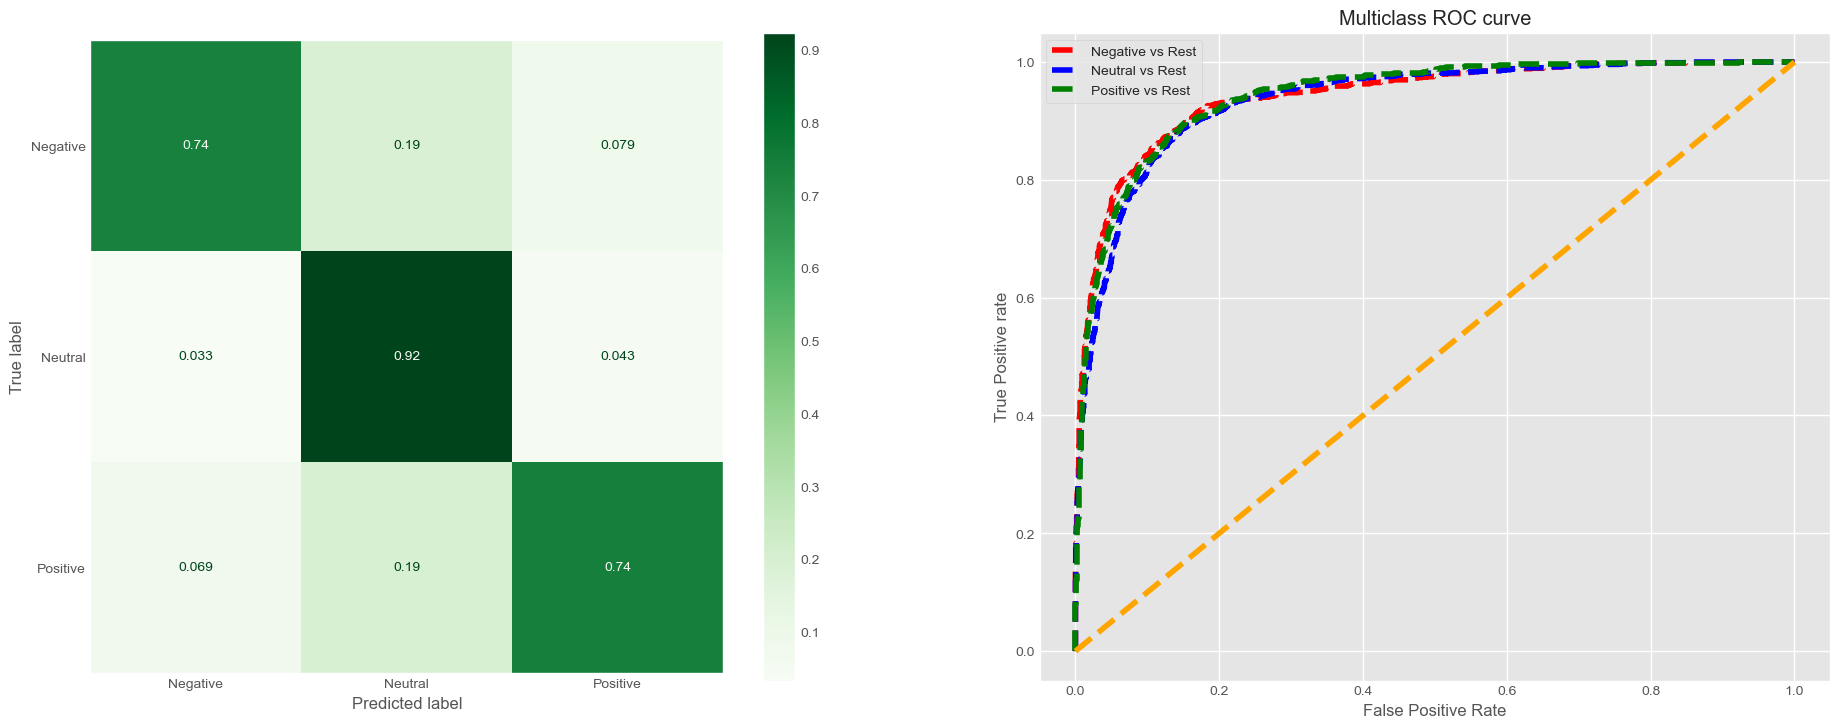

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
plt.style.use("ggplot")


baseline_log_clf = Pipeline([('vectorizer', TfidfVectorizer()),
                                ('classifier', LogisticRegression())])

baseline_log_clf.fit(X_train, y_train)

# Making our predictions
y_pred = baseline_log_clf.predict(X_test)


multiclass_eval(y_test, y_pred, X_test, X_train, baseline_log_clf, n_class=3)


**The baseline LR classifier is correctly guessing 92% of the tweets as "Neutral". This suggests that there is a class imbalance with the data that where we have mostly "Neutral" tweets. The LR model is also correctly guessing the "negative" and "postive" tweets as 74%.**

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b> 5. <span style='color:white'><span style='color:#F1A424'>|</span></span></b> Iterate</b></p></div>

**Training and improving a model over multiple cycles.**

## <b> 5.1 <span style='color:#F1A424'>|</span> Random Forest</b>

### <b> 5.1.1 <span style='color:#F1A424'>|</span> RandomForest: Model #1</b>

Training Score: 1.0             Test Score:0.82


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1324
           1       0.79      0.95      0.86      1746
           2       0.84      0.73      0.78      1203

    accuracy                           0.82      4273
   macro avg       0.83      0.81      0.82      4273
weighted avg       0.83      0.82      0.82      4273



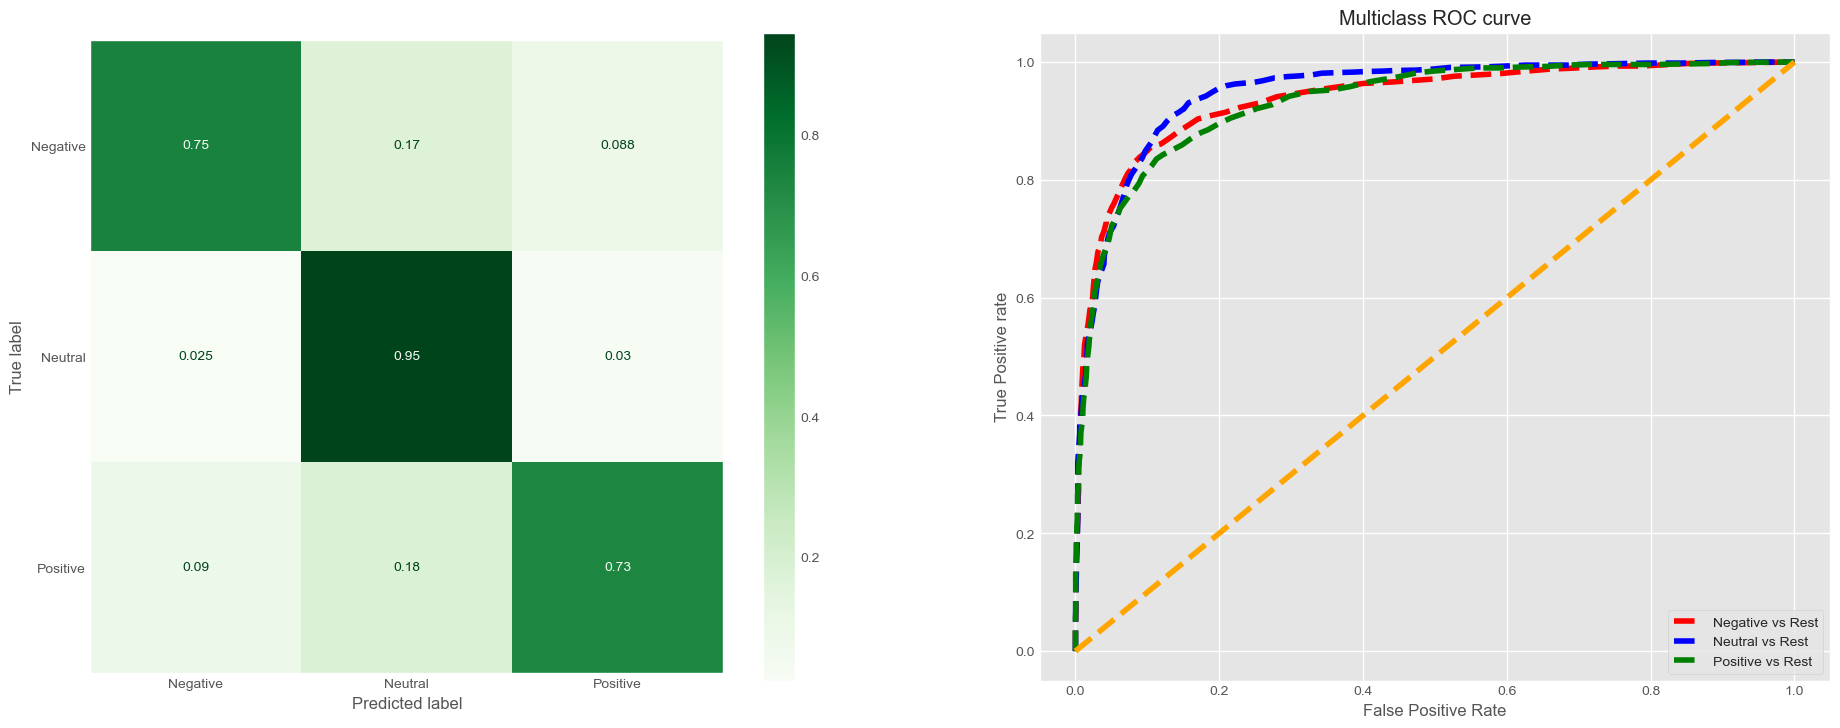

In [92]:
rf_clf = Pipeline([('tfidf', TfidfVectorizer()),
                        ('rf_clf', RandomForestClassifier(random_state=42))])

rf_clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf)

**The model is overfitting to the training data and is not performing that well making predictions on all classes even though they are much better compared to the baseline.**

### <b> 5.1.2 <span style='color:#F1A424'>|</span> Tuned RandomForest: Model #1</b>

**Tuning the parameters of the RF model to check for imporvement.**

In [93]:
# Define parameters to tune
param_grid = {
    'rf_clf__criterion': ['gini', 'entropy'], 
    'rf_clf__n_estimators': [100, 200, 500],
    'rf_clf__max_depth': [5, 8, 15, 25],
    'rf_clf__min_samples_split': [2, 5, 10],
    'rf_clf__min_samples_leaf': [1,5,8]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5 , n_jobs=-1, verbose=1, scoring='recall_macro')

# Fit Grid Search to training data
grid_search.fit(X_train, y_train)

# Best parameters
print('Best params:', grid_search.best_params_)   

# Best score
print('Best accuracy: ', grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best params: {'rf_clf__criterion': 'gini', 'rf_clf__max_depth': 25, 'rf_clf__min_samples_leaf': 1, 'rf_clf__min_samples_split': 5, 'rf_clf__n_estimators': 500}
Best accuracy:  0.6107596740716279


**Aplying the hyperparameters to the model.**

Training Score: 0.71             Test Score:0.65


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.43      0.58      1324
           1       0.56      0.99      0.71      1746
           2       0.88      0.40      0.55      1203

    accuracy                           0.65      4273
   macro avg       0.78      0.60      0.61      4273
weighted avg       0.75      0.65      0.62      4273



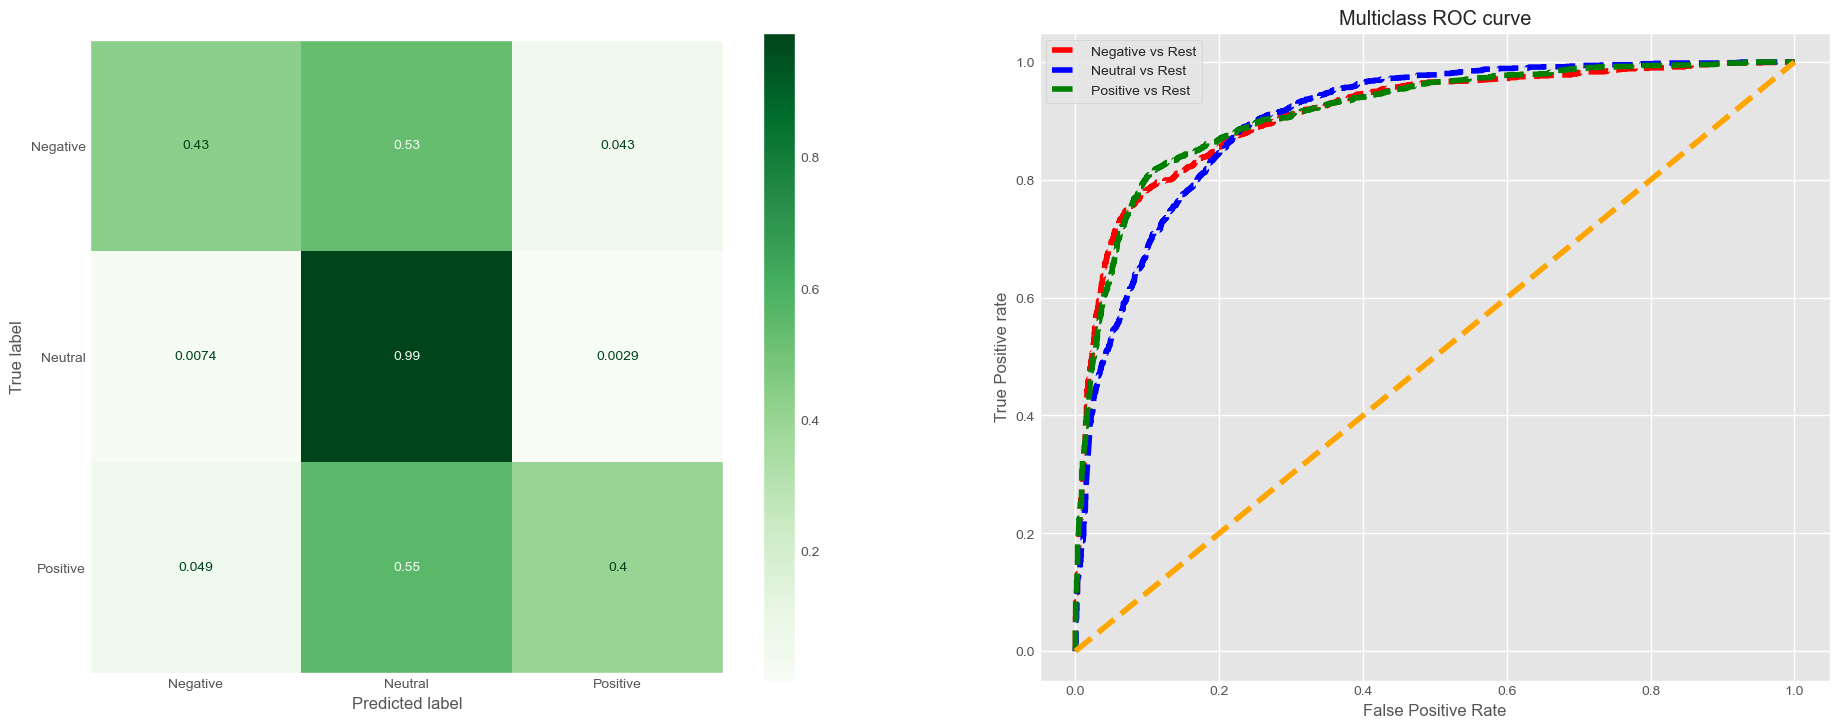

In [94]:
rf_clf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                        ('rf_clf_pipe', RandomForestClassifier(criterion='entropy', 
                                                               max_depth=25, 
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               n_estimators=500,
                                                               random_state=42))])

rf_clf_pipe.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_pipe)

**The tuned model slightly increased perofromance in making predictions for the "neutral" sentiments from 95% to 99%.There was also a 0.32% sharp decrease in making predictions for the "negative" class from 75% to 43% as well as a sharp 33% drop from 73% to 40% for the "positive" class.Ad rop in accuracy is also noted for both the training and test sets. The model is also still overfitting to the training data.**

### <b> 5.1.3 <span style='color:#F1A424'>|</span> Random Oversampled RandomForest: Model #2</b>

Training Score: 1.0             Test Score:0.83


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1324
           1       0.80      0.93      0.86      1746
           2       0.83      0.74      0.78      1203

    accuracy                           0.83      4273
   macro avg       0.83      0.81      0.82      4273
weighted avg       0.83      0.83      0.82      4273



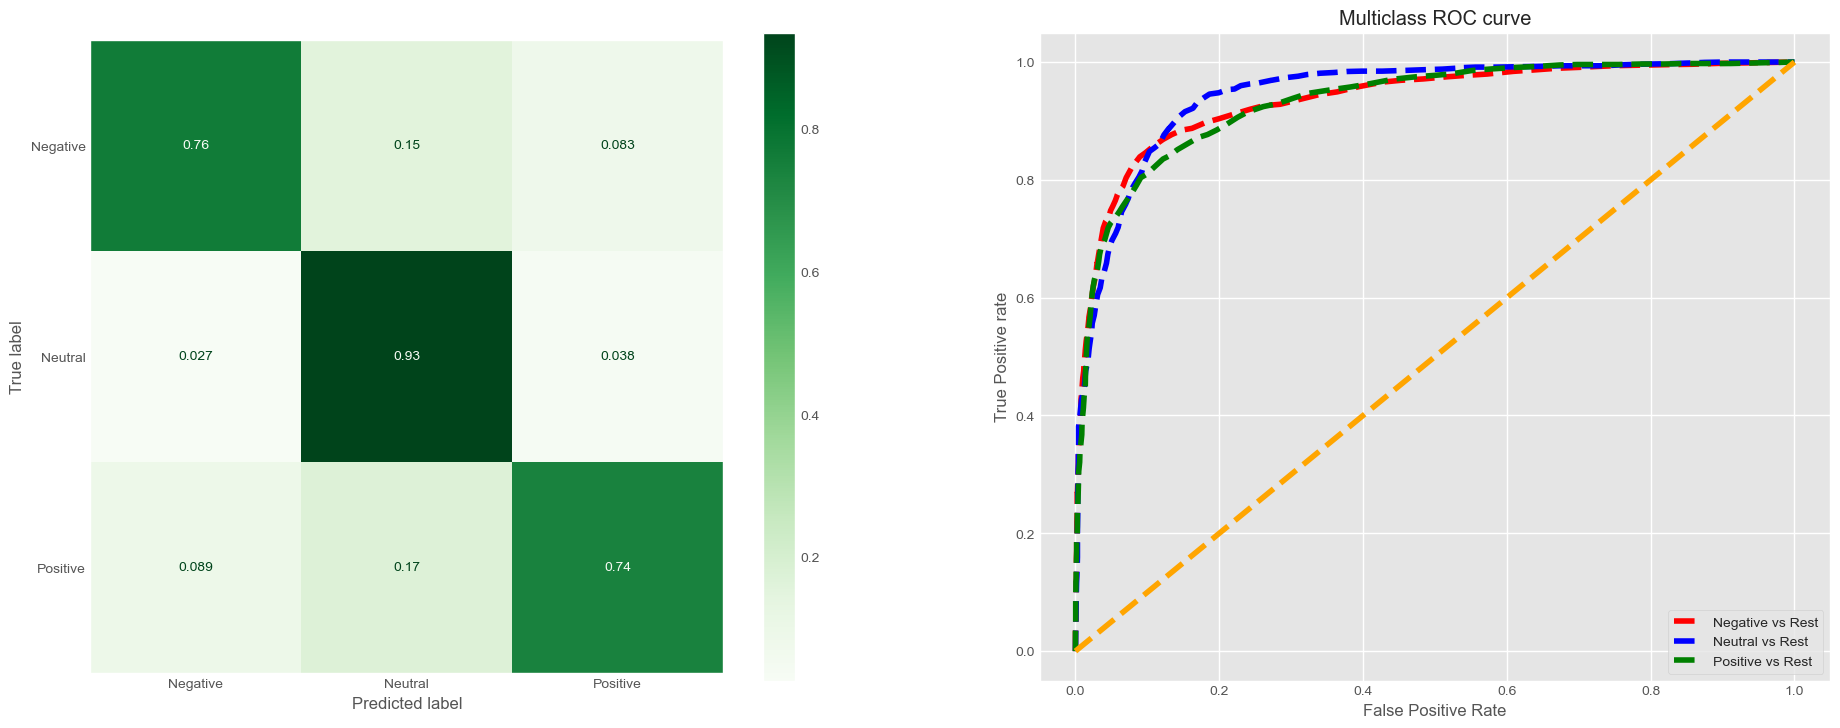

In [95]:
import imblearn

rf_clf_over = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('rf_clf_over', RandomForestClassifier(random_state=42))
])

rf_clf_over.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_over.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_over)

**Oversampling the data in this case hasn't really helped with the neutral class still being higher relative to the positive and negative classes. There is only a slight increase in the test accuracy compared to the first untuned RF model**

### <b> 5.1.4 <span style='color:#F1A424'>|</span> Tuned Random Oversampled RandomForest: Model #2</b>

Training Score: 0.86             Test Score:0.78


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.43      0.58      1324
           1       0.56      0.99      0.71      1746
           2       0.88      0.40      0.55      1203

    accuracy                           0.65      4273
   macro avg       0.78      0.60      0.61      4273
weighted avg       0.75      0.65      0.62      4273



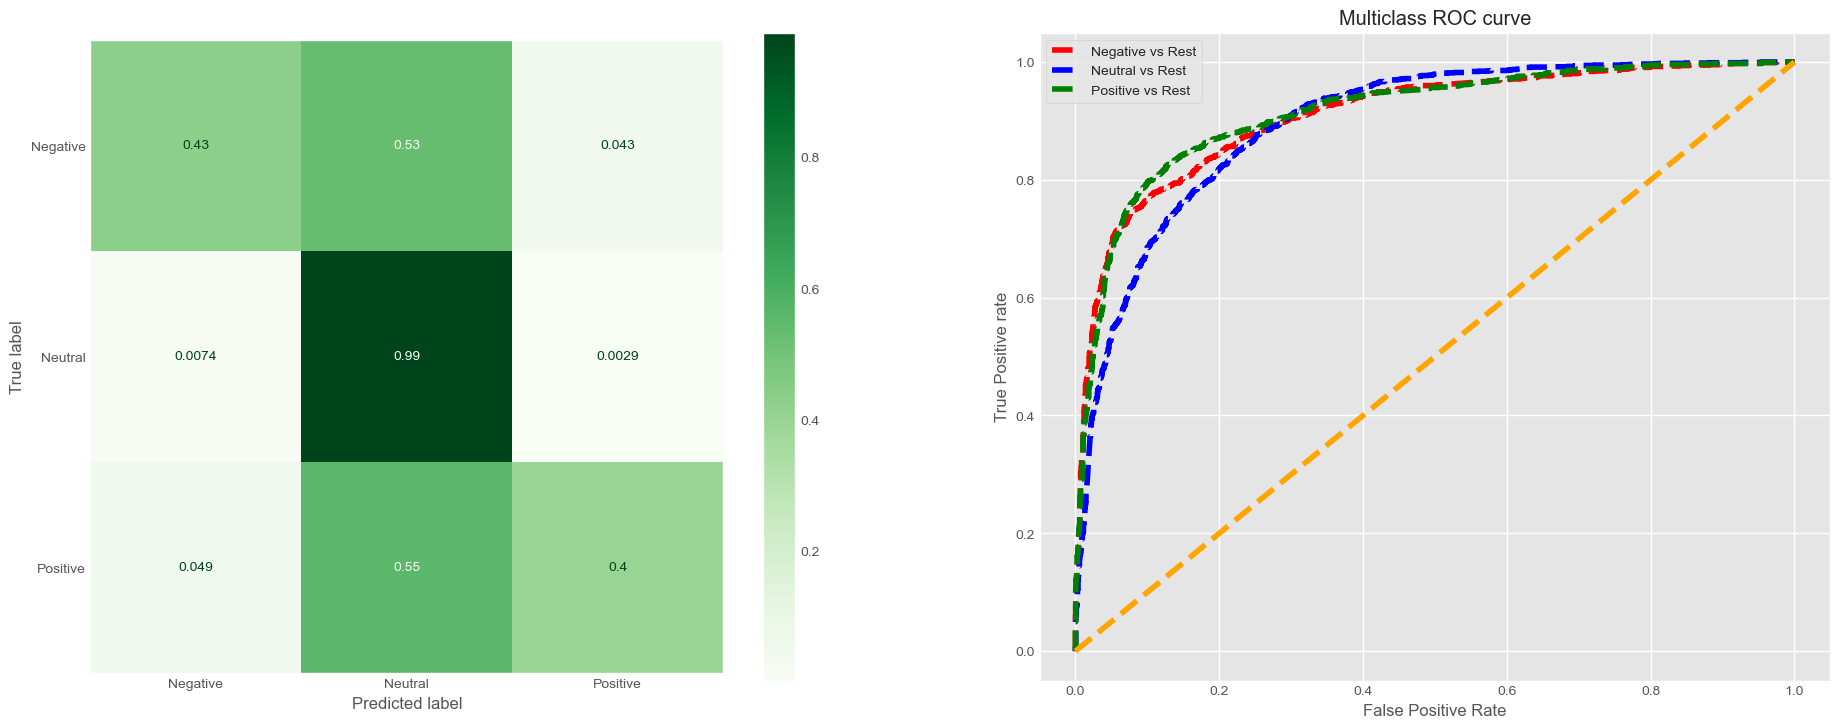

In [96]:
rf_clf_over_tuned = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('rf_clf_over_tuned', RandomForestClassifier(class_weight='balanced', 
                                           criterion='entropy', 
                                           max_depth=25, 
                                           min_samples_leaf=1,
                                           min_samples_split=10,
                                           n_estimators=500,
                                           random_state=42))
])

rf_clf_over_tuned.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_over_tuned)

**The models that seem to have performed well out of all Random forest models are the untuned Random Forest model without the oversampled data and untuned Random Forest model with the oversampled data with almost identical recall macro-avergae score of 0.81. The models are however still overfitting on the training data.**

## <b> 5.2 <span style='color:#F1A424'>|</span> Logistic Regression</b>

### <b> 5.2.1 <span style='color:#F1A424'>|</span> Logistic Regression: Model #1</b>

Training Score: 0.94             Test Score:0.82


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1324
           1       0.81      0.88      0.84      1746
           2       0.81      0.77      0.79      1203

    accuracy                           0.82      4273
   macro avg       0.82      0.81      0.82      4273
weighted avg       0.82      0.82      0.82      4273



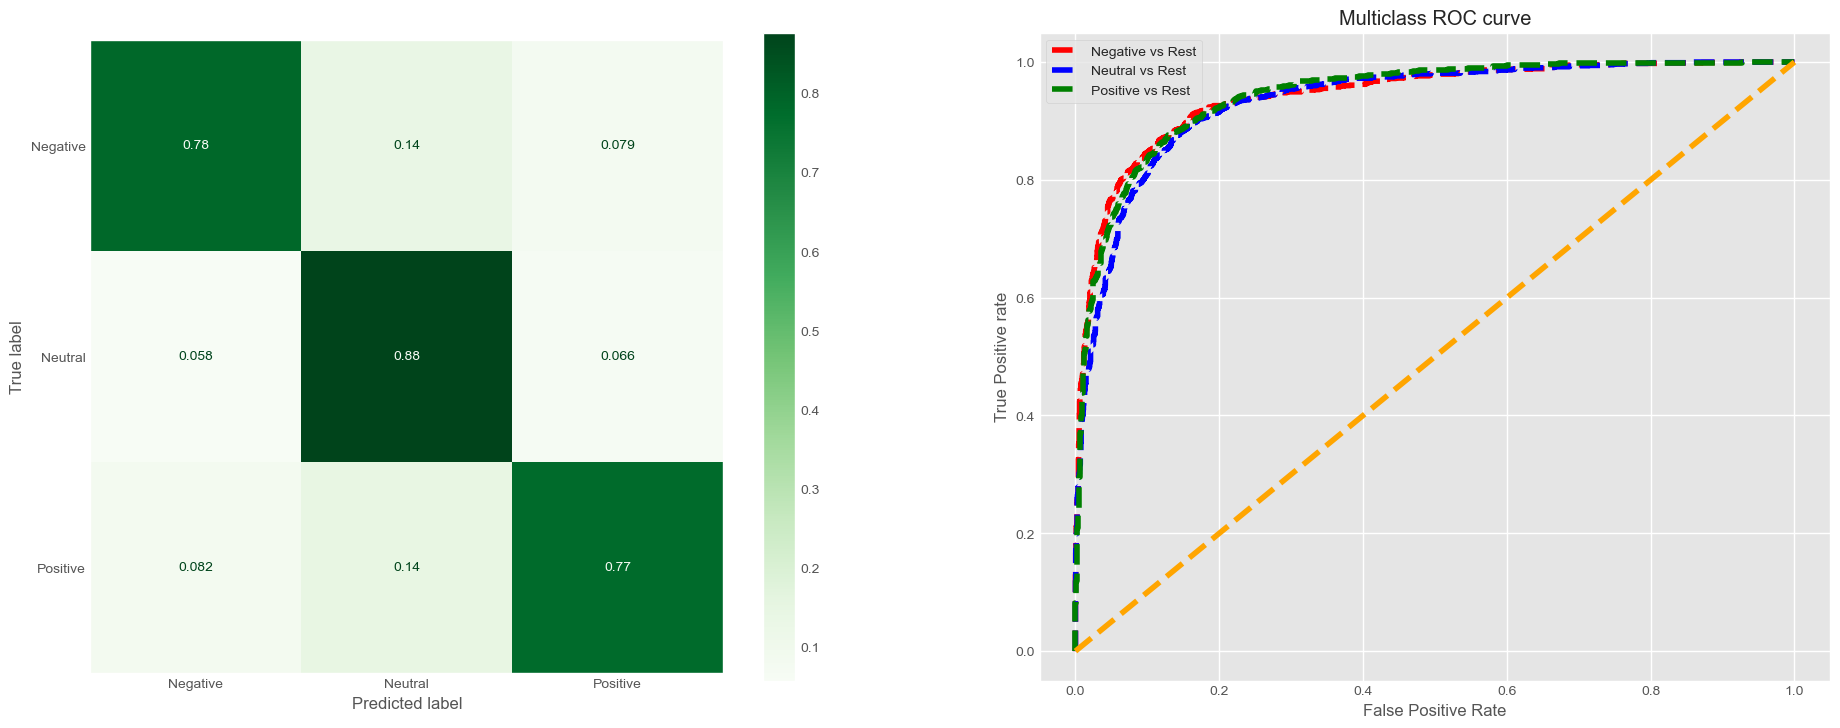

In [97]:
log_clf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                        ('log_clf_pipe', LogisticRegression(class_weight='balanced', random_state=42,))])

log_clf_pipe.fit(X_train, y_train)

# Predicting the Test set results
y_pred = log_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, log_clf_pipe)

**Without any tuning or adjustments, this model is performing sightly similar to the best performing RF models with a 0.81 recall macro score and performing better in each class compared to the baseline. It is overfitting the training data though so we can tune it and see if we can achieve a non-overfitting model.**

### <b> 5.2.2 <span style='color:#F1A424'>|</span> Tuned Logistic Regression: Model #1</b>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training Score: 1.0             Test Score:0.91


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1324
           1       0.90      0.95      0.92      1746
           2       0.90      0.87      0.89      1203

    accuracy                           0.91      4273
   macro avg       0.91      0.90      0.90      4273
weighted avg       0.91      0.91      0.91      4273



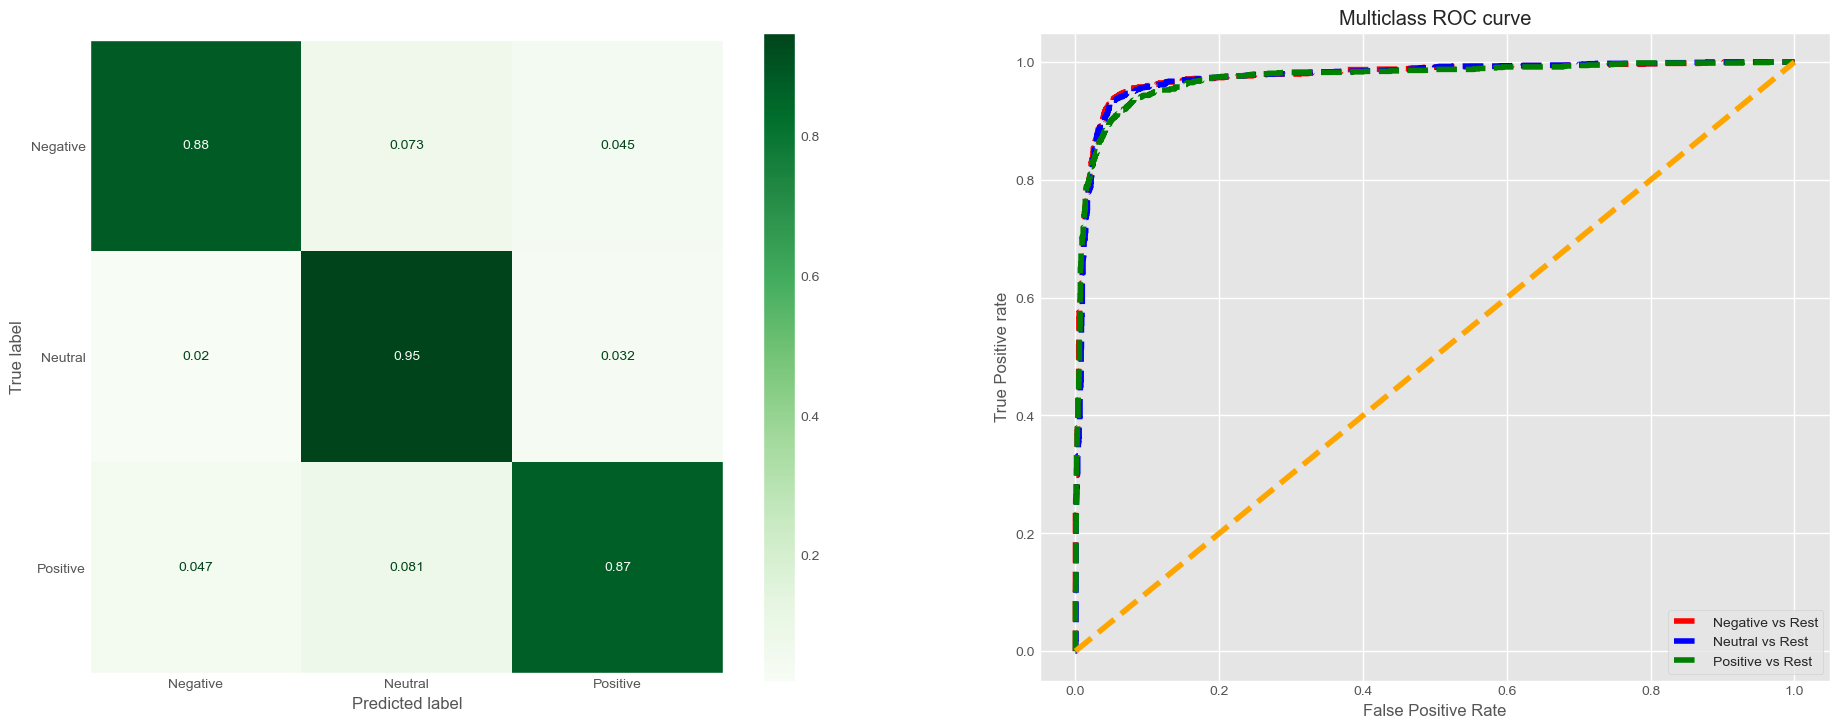

In [98]:
from sklearn.model_selection import GridSearchCV

log_clf = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    
    ('log_clf', LogisticRegression())
])
param_grid = {
    'log_clf__C': [0.01, 0.1, 1, 10, 100],
    'log_clf__penalty': ['l1', 'l2'],
    'log_clf__solver': ['liblinear']
}
log_clf_CV = GridSearchCV(log_clf, param_grid, cv=5, verbose=1, n_jobs=-1)
log_clf_CV.fit(X_train, y_train)
y_pred = log_clf_CV.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, log_clf_CV)



**This seems to the best performing model so far with a recall-macro-avg score of 0.90. The f1- scores for all the classes are ranging from 89% - 92% meaning that the model is performing well in making it's predictions. the "neutral" class has remained constant in the > 93% range compared to the other models tested. We can also note a 10% increase for both the "negative" and "positive" classes from 78% to 88%. The model has also recorded the highest test accuracy of 91% compared to other models so far. The model is still however overfitting to the training data so we can try to oversample the data and see if it helps.**

### <b> 5.2.3 <span style='color:#F1A424'>|</span> Random Oversampled Logistic Regression: Model #2</b>

Training Score: 1.0             Test Score:0.84


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1324
           1       0.84      0.90      0.87      1746
           2       0.84      0.80      0.82      1203

    accuracy                           0.84      4273
   macro avg       0.85      0.84      0.84      4273
weighted avg       0.84      0.84      0.84      4273



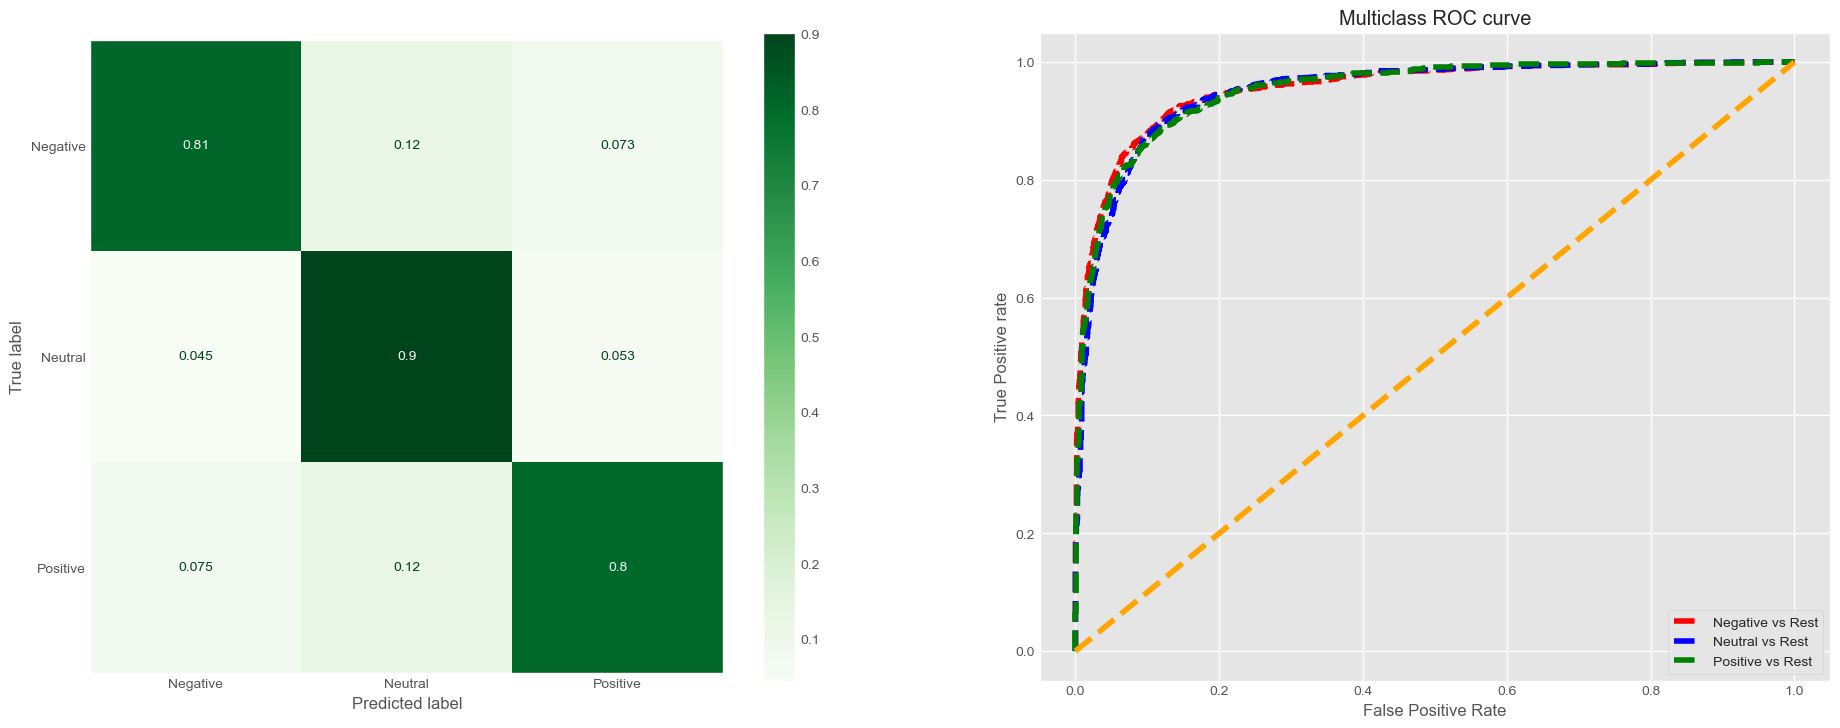

In [99]:
log_clf_over = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('log_clf_over', LogisticRegression(class_weight='balanced', 
                                        C=100, 
                                        penalty='l2', 
                                        solver='liblinear',
                                        random_state=42))
])

log_clf_over.fit(X_train, y_train)

# Predicting the Test set results
y_pred = log_clf_over.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, log_clf_over)

**There seems to be a decrease in performance compared to the previous tuned LR model but a better recall macro score compared to the baseline and best performing RF models. The model is still overfitting to the training data with a reduced accuracy score of 0.84.**

### <b> 5.2.4<span style='color:#F1A424'>|</span> Tuned Random Oversampled Logistic Regression: Model #2</b>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training Score: 1.0             Test Score:0.91


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1324
           1       0.90      0.95      0.92      1746
           2       0.90      0.87      0.89      1203

    accuracy                           0.91      4273
   macro avg       0.91      0.90      0.91      4273
weighted avg       0.91      0.91      0.91      4273



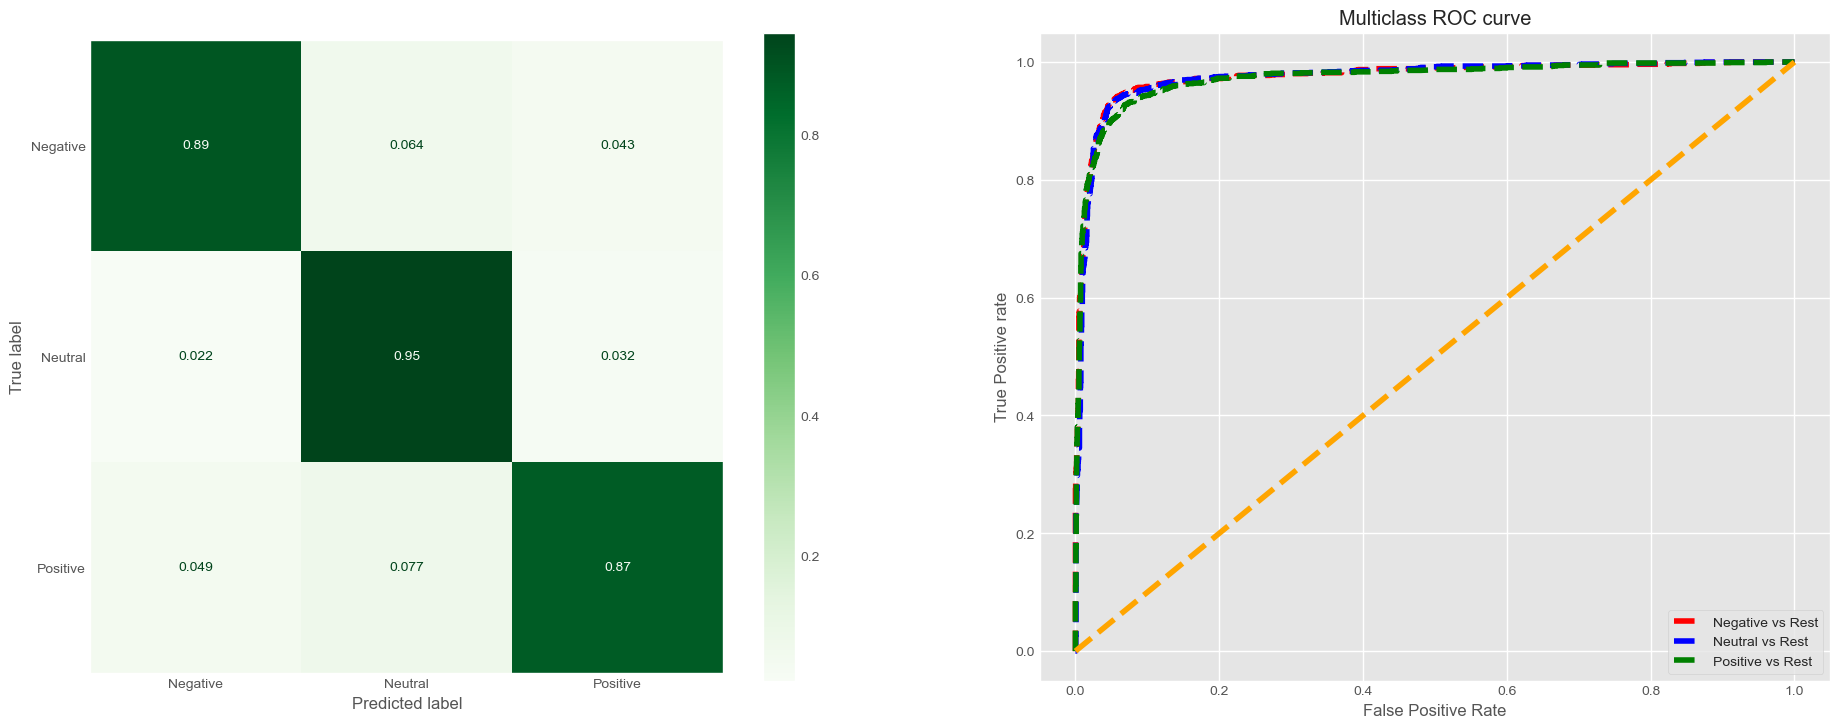

In [100]:
# logistic regression with oversampling and hyperparameter tuning

log_clf = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('log_clf', LogisticRegression())
])
param_grid = {
    'log_clf__C': [0.01, 0.1, 1, 10, 100],
    'log_clf__penalty': ['l1', 'l2'],
    'log_clf__solver': ['liblinear']
}
log_clf_over_CV = GridSearchCV(log_clf, param_grid, cv=5, verbose=1, n_jobs=-1)
log_clf_over_CV.fit(X_train, y_train)
y_pred = log_clf_over_CV.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, log_clf_over_CV)

**There seems to be a simlar performance with the tuned LR model without oversampling the data but with a slightly lower recall macro score of 0.90. The model is still overfitting to the training data.**

## <b> 5.3 <span style='color:#F1A424'>|</span> Complement NB</b>

**Complement Naive Bayes (CNB) is a variant of the traditional Naive Bayes (NB) algorithm. It's particularly suited for imbalanced data sets where the data is skewed towards one class.**

**In traditional Naive Bayes, we calculate the probability of a feature given a class. However, in Complement Naive Bayes, we calculate the probability of a feature given the complement of a class (i.e., all other classes except the current one). This approach helps to correct the bias towards the majority class, which is a common problem in imbalanced datasets.**

### <b> 5.3.1 <span style='color:#F1A424'>|</span> Complement NB: Model #1</b>

Training Score: 0.9             Test Score:0.72


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1324
           1       0.80      0.64      0.71      1746
           2       0.66      0.77      0.71      1203

    accuracy                           0.72      4273
   macro avg       0.72      0.73      0.72      4273
weighted avg       0.73      0.72      0.72      4273



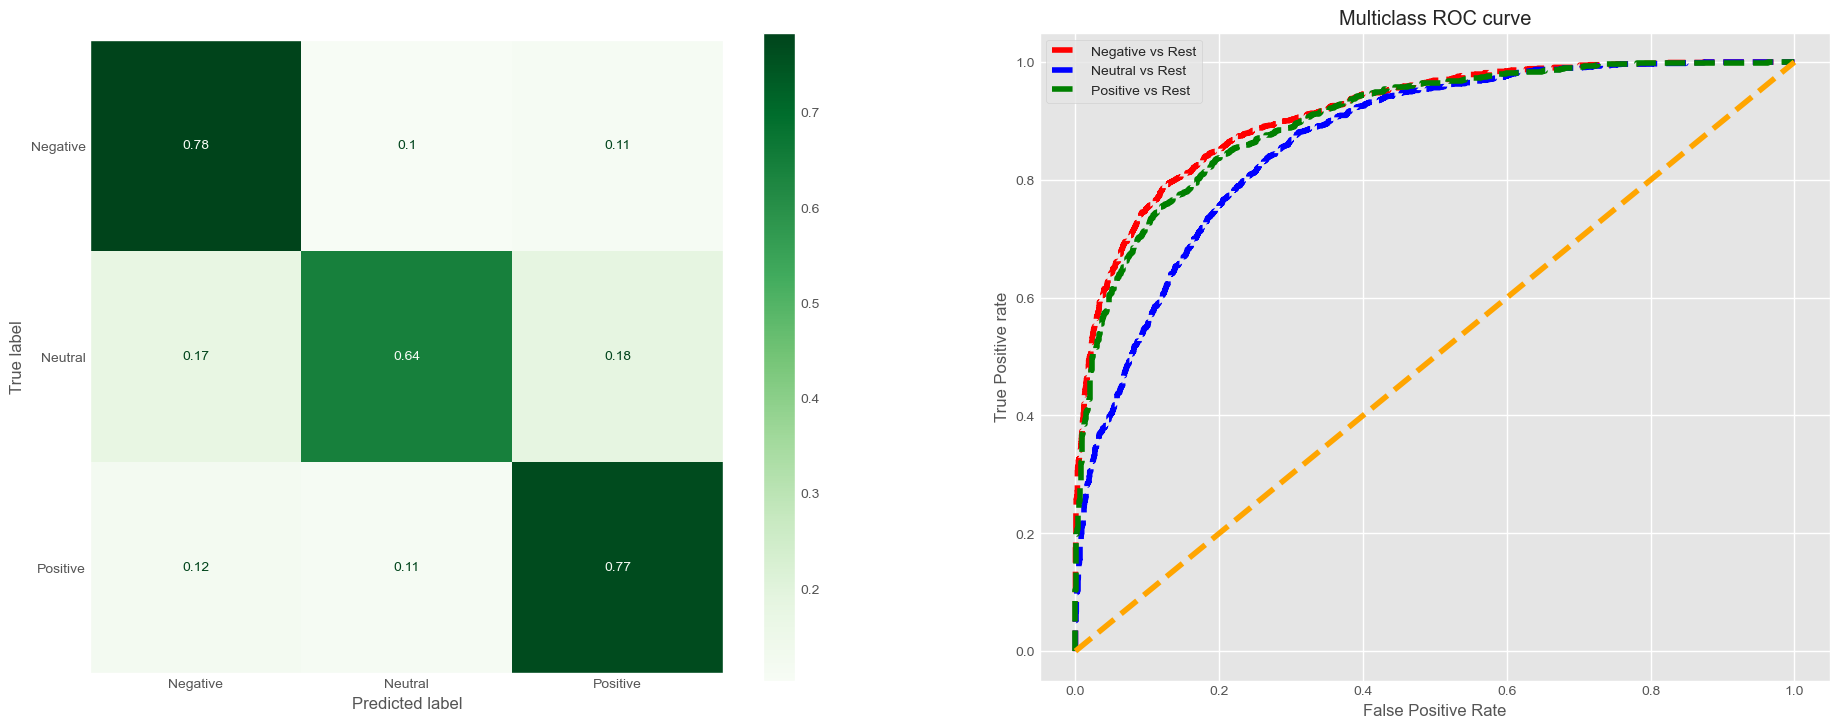

In [101]:
from sklearn.naive_bayes import ComplementNB

nb_clf = Pipeline([('tfidf', TfidfVectorizer()),
                        ('nb_clf', ComplementNB())])

nb_clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = nb_clf.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, nb_clf)
                   

**There seems to be a drop in performance while identifying the "neutral" class compared to the previously tested models. The recall macro-average score has also dropped to around 73%. The model is also overfitting to the training data.**

### <b> 5.3.2 <span style='color:#F1A424'>|</span> Tuned Complement NB: Model #1</b>

**Tuning the model.**

In [102]:
parameters = {'nb_clf__alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search = GridSearchCV(nb_clf, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

**Tuned Model.**

Training Score: 0.89             Test Score:0.73


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      1324
           1       0.80      0.66      0.72      1746
           2       0.67      0.77      0.72      1203

    accuracy                           0.73      4273
   macro avg       0.73      0.74      0.73      4273
weighted avg       0.74      0.73      0.73      4273



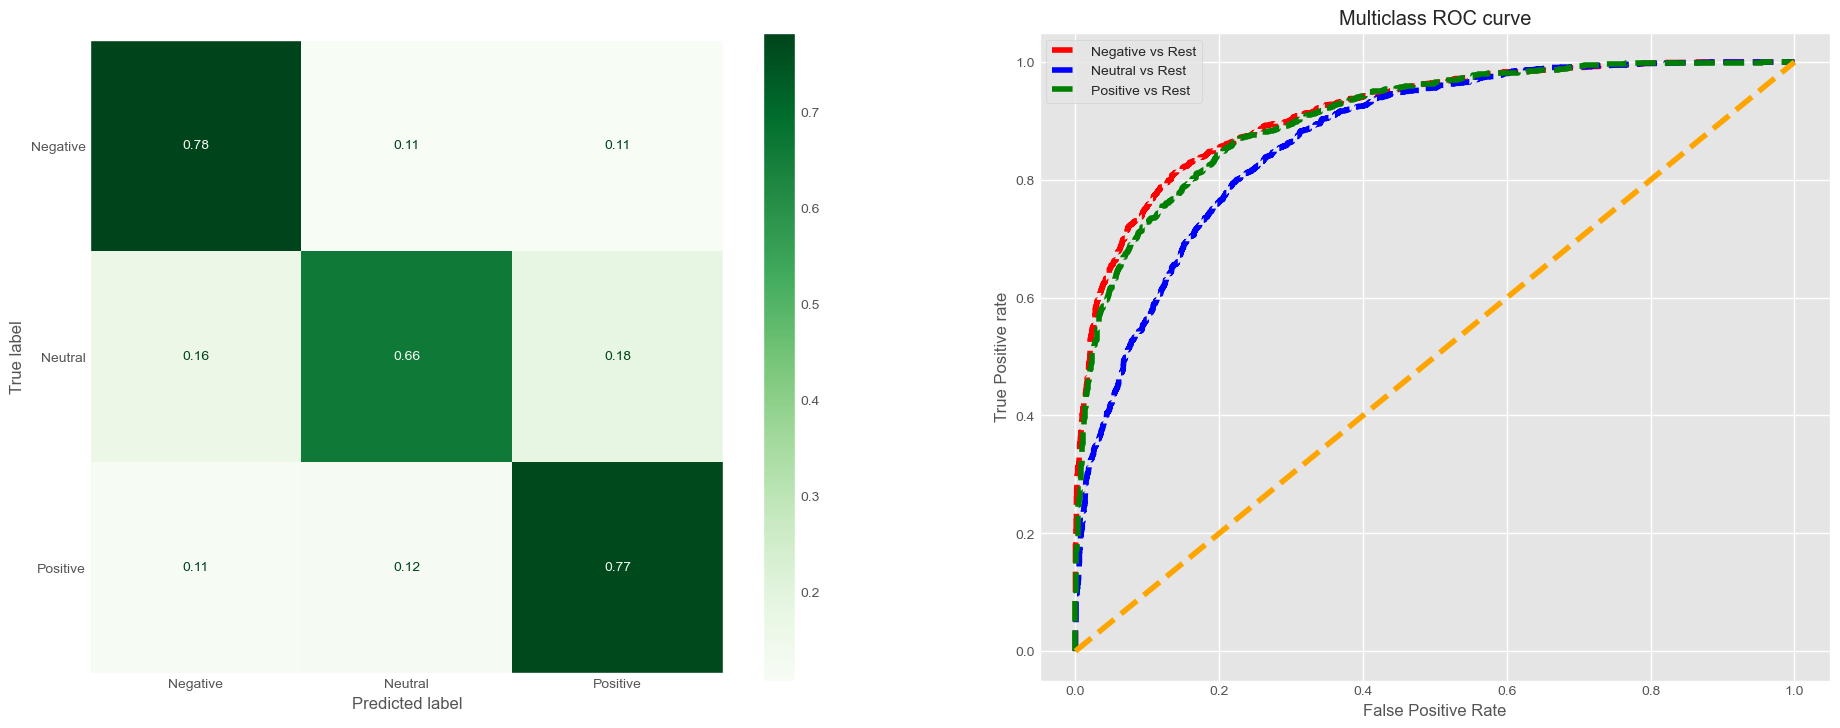

In [103]:
multiclass_eval(y_test, y_pred, X_test, X_train, grid_search.best_estimator_)

**Performance seems to be more or the less same compared to the untuned model. The model is still overfitting to the training data as well.**

### <b> 5.3.3 <span style='color:#F1A424'>|</span> Random Oversampled Complement NB: Model #2</b>

Training Score: 0.87             Test Score:0.69


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.81      0.72      1324
           1       0.83      0.54      0.65      1746
           2       0.63      0.78      0.70      1203

    accuracy                           0.69      4273
   macro avg       0.70      0.71      0.69      4273
weighted avg       0.72      0.69      0.69      4273



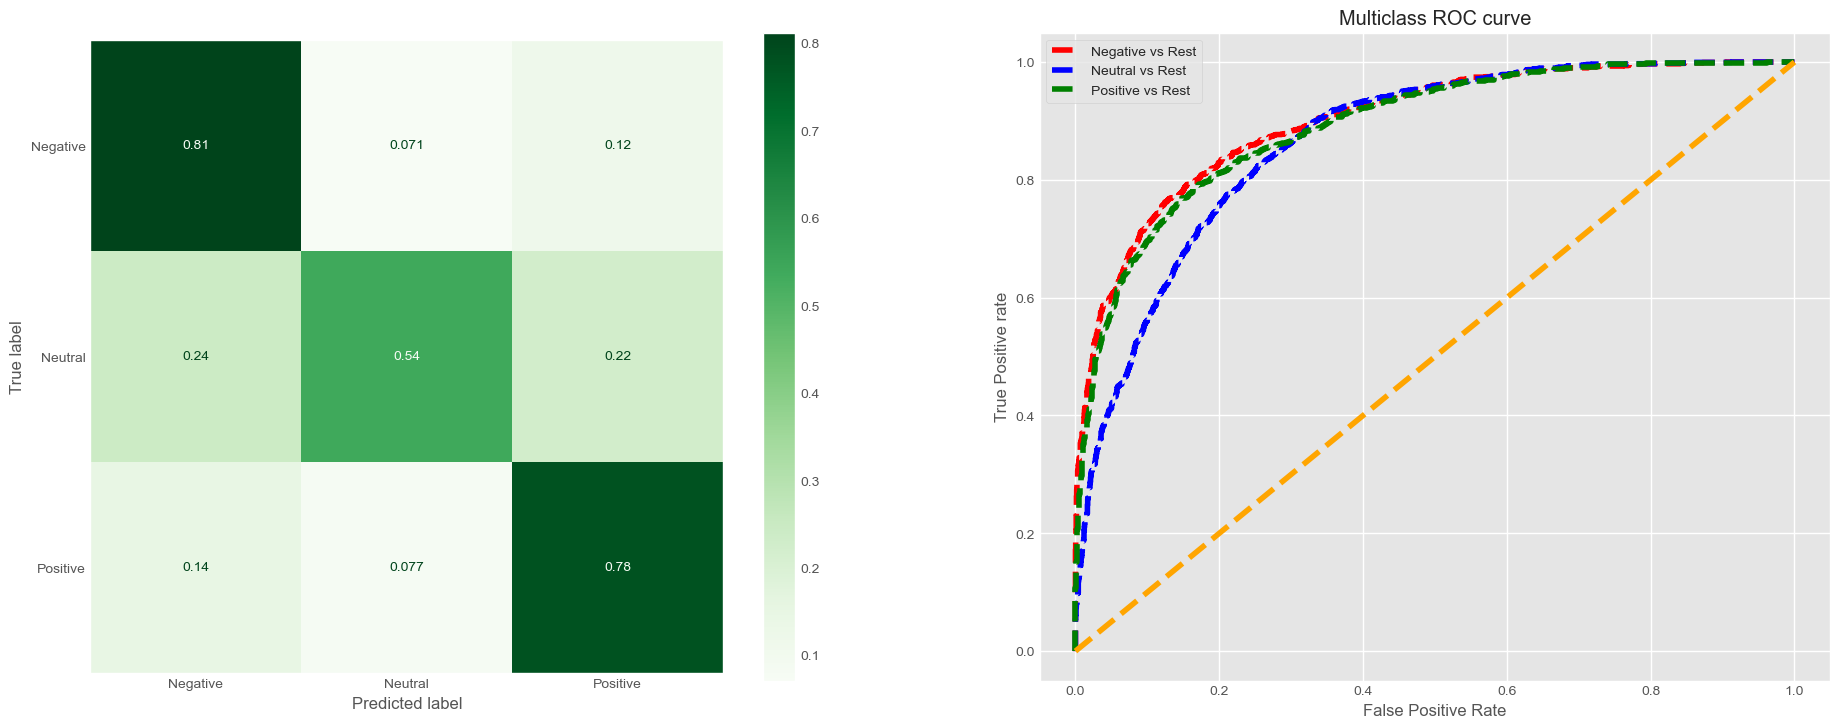

In [104]:
# Add oversampling to the pipeline
nb_clf_over = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('nb_clf_over', ComplementNB())
])

nb_clf_over.fit(X_train, y_train)

# Predicting the Test set results
y_pred = nb_clf_over.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, nb_clf_over)

**Adding oversampling seems to degrade the performance of the model. We will tune and oversample the data to see if there will be any imporvement.**

### <b> 5.3.4 <span style='color:#F1A424'>|</span> Tuned Random Oversampled Complement NB: Model #2</b>

Training Score: 0.87             Test Score:0.69


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.81      0.72      1324
           1       0.83      0.54      0.65      1746
           2       0.63      0.78      0.70      1203

    accuracy                           0.69      4273
   macro avg       0.70      0.71      0.69      4273
weighted avg       0.72      0.69      0.69      4273



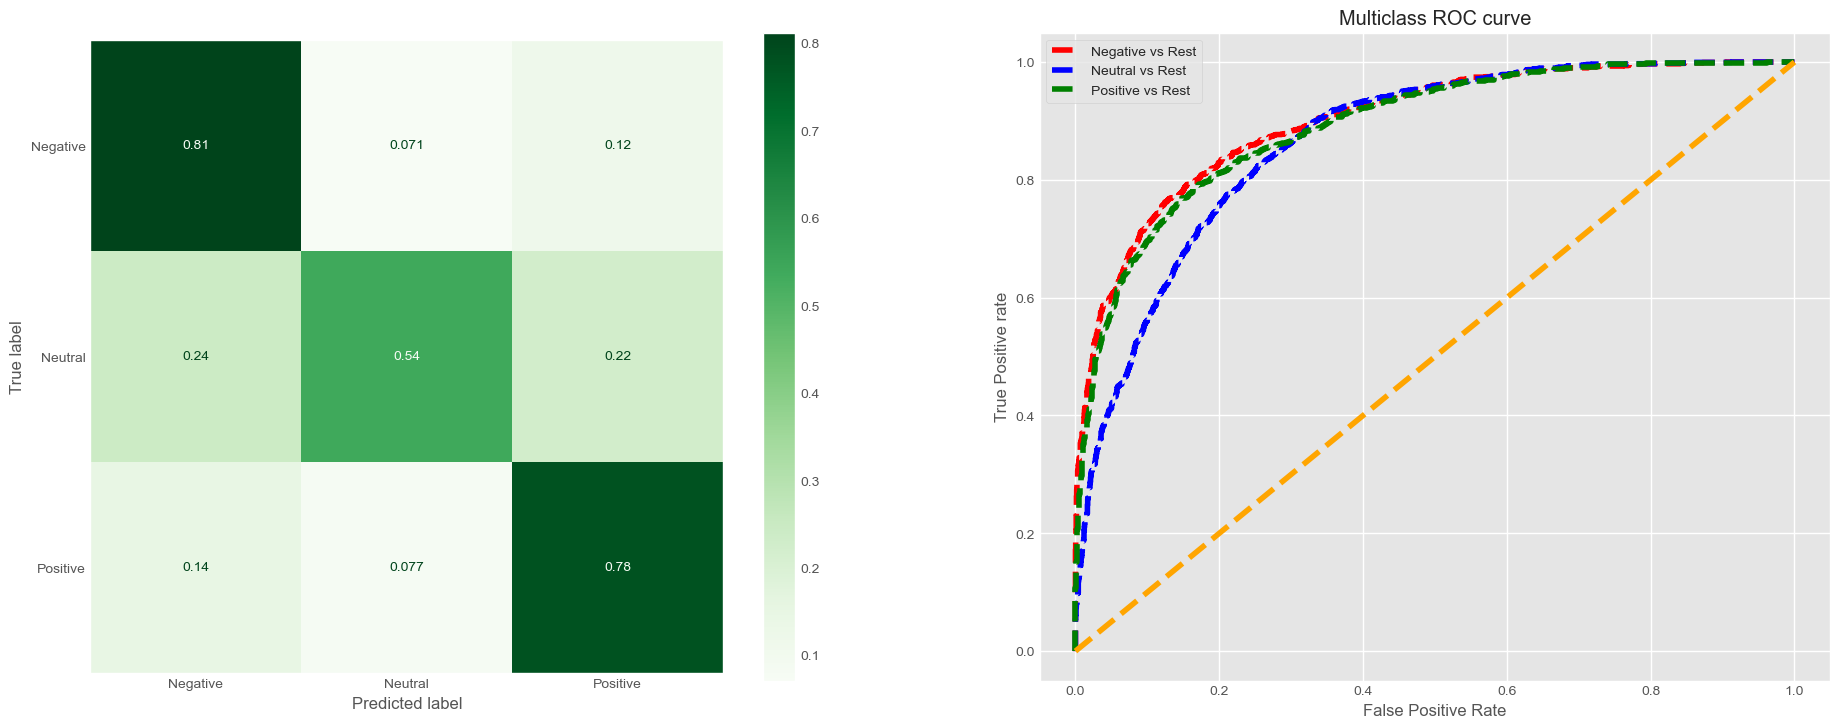

In [105]:
# Tuned Random Oversampled Complement NB
parameters = {'nb_clf_over__alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search = GridSearchCV(nb_clf_over, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

multiclass_eval(y_test, y_pred, X_test, X_train, grid_search.best_estimator_)

**Even after tuning the model and oversampling the data, the model performs very similar to the previous Complement NB model with just oversampling the data. In general, the Complement NB models tend to perform very poorly compared to all the other models tested.**

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>6 |</span></span></b> Evaluate</b></p></div>

**As discussed above, the winner of this task was the tuned logistic regression model with a recall macro score of 90%. The tuned random oversampled logistic regression model also scored the same recall macro - average score of 90% ; however, since it got to the same score only after the random oversampling we are declaring the non-oversampled model as the winner.**

## <b> 6.1.1 <span style='color:#F1A424'>|</span> Model Evaluation</b>

| Model                         | AverageMAcroRecall | Negativerecall | neutralrecall | positiverecall | overallaccuracy | f1-score |
| :---------------------------- | :----------------: | -------------: | ------------- | -------------- | --------------- | -------- |
| Baseline-Logistic Regression  |        0.80        |           0.92 | 0.74          | 0.74           | 0.81            | 0.81     |
| Random Forest                 |        0.81        |           0.75 | 0.95          | 0.73           | 0.82            | 0.82     |
| TunedRandomForest             |        0.60        |           0.43 | 0.99          | 0.40           | 0.65            | 0.62     |
| OversampledRandomForest       |        0.81        |           0.76 | 0.93          | 0.74           | 0.83            | 0.82     |
| TunedOversampledRandom Forest |        0.60        |           0.43 | 0.99          | 0.40           | 0.65            | 0.62     |
| LogisticRegression            |        0.81        |           0.78 | 0.88          | 0.77           | 0.82            | 0.82     |
| TunedLR                       |        0.90        |           0.88 | 0.95          | 0.87           | 0.91            | 0.91     |
| OversampledLR                 |        0.84        |           0.81 | 0.90          | 0.80           | 0.84            | 0.84     |
| Tuned OversampledLR           |        0.90        |           0.89 | 0.95          | 0.87           | 0.91            | 0.91     |
| ComplementNB                  |        0.73        |           0.78 | 0.64          | 0.77           | 0.72            | 0.72     |
| TunedComplementNB             |        0.74        |           0.78 | 0.66          | 0.77           | 0.73            | 0.73     |
| OversampledComplementNB       |        0.71        |           0.81 | 0.54          | 0.78           | 0.69            | 0.69     |
| TunedOversampledComplementNB  |        0.71        |           0.81 | 0.54          | 0.78           | 0.69            | 0.69     |

**The summary table shows the performance metrics of different machine learning models on a sentiment analysis task. The models are evaluated based on the average macro recall, negative recall, neutral recall, positive recall, overall accuracy, and F1-score.**

**Based on the summary table, the best performing models are the Tuned `Logistic Regression` and `Tuned Oversampled Logistic Regression`, which have the highest values for all the metrics. These models are logistic regression models that have been tuned using some optimization techniques, such as grid search to find the best hyperparameters. They also use Random oversampling, which is a technique to balance the class distribution by creating synthetic samples of the minority class. These models can accurately classify the sentiments of the data, and they have a good balance between precision and recall for each class.**

**The worst performing models are `Tuned RandomForest` and `Tuned Oversampled Random Forest`, which have the lowest values for most of the metrics. These models are random forest models that have been tuned using some optimization techniques, but they have a poor performance on the sentiment analysis task. They have a very low recall for the negative and positive classes, which means that they fail to identify most of the negative and positive sentiments in the data. They also have a low accuracy and F1-score, which means that they have a poor balance between precision and recall.**

## <b> 6.1.2 <span style='color:#F1A424'>|</span> Feature Importance - Tuned LR Model</b>

In [122]:
# Get the trained logistic regression model
trained_log_clf = log_clf_CV.best_estimator_.named_steps['log_clf']

# Get the feature names from the TfidfVectorizer
feature_names = log_clf_CV.best_estimator_.named_steps['tfidf'].get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = trained_log_clf.coef_[0]

# Create a DataFrame for easier visualization
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

         Feature  Importance
18400      worst   53.255328
12767   pathetic   48.092550
4692   desperate   46.436774
2578      brutal   46.337030
7842       idiot   44.450637
...          ...         ...
13249    popular  -33.124117
18286        win  -36.423105
7038        good  -36.531266
5952   excellent  -37.708515
7351       happy  -43.891393

[18556 rows x 2 columns]


In [121]:
# Get the coefficients from the logistic regression model and reverse their sign
coefficients = -trained_log_clf.coef_[0]

# Create a DataFrame for easier visualization
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

         Feature  Importance
7351       happy   43.891393
5952   excellent   37.708515
7038        good   36.531266
18286        win   36.423105
13249    popular   33.124117
...          ...         ...
7842       idiot  -44.450637
2578      brutal  -46.337030
4692   desperate  -46.436774
12767   pathetic  -48.092550
18400      worst  -53.255328

[18556 rows x 2 columns]


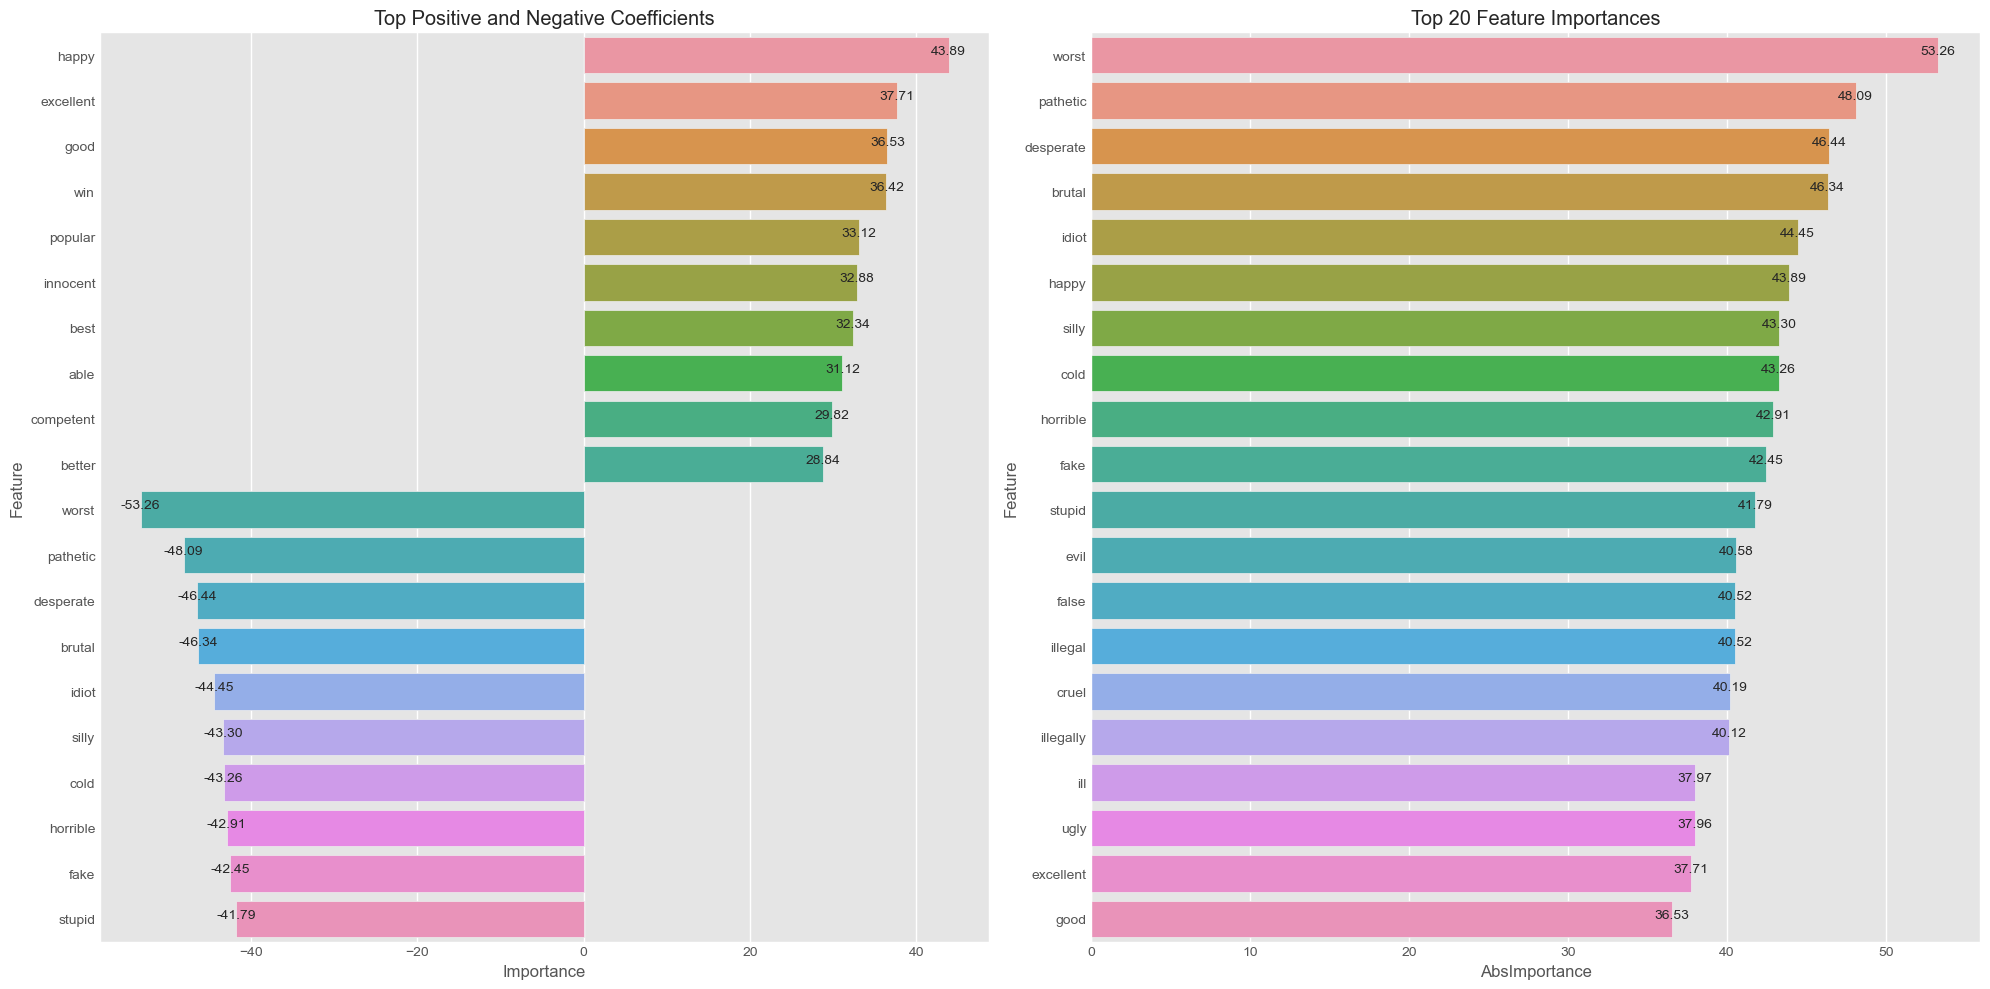

In [108]:

def plot_feature_importance(feature_importances):
    # Get top 10 positive and top 10 negative features by coefficient
    top_10_positive = feature_importances.sort_values(by='Importance', ascending=False).iloc[:10]
    top_10_negative = feature_importances.sort_values(by='Importance').iloc[:10]
    top_20_coefficients = pd.concat([top_10_positive, top_10_negative])

    # Get top 20 features by absolute importance
    top_20_importances = feature_importances.assign(AbsImportance = lambda x: x.Importance.abs()).sort_values(by='AbsImportance', ascending=False).iloc[:20]

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    # Plot the top positive and negative coefficients
    coeff_plot = sns.barplot(x='Importance', y='Feature', data=top_20_coefficients, ax=axes[0])
    axes[0].set_title('Top Positive and Negative Coefficients')

    # Add annotations
    for p in coeff_plot.patches:
        coeff_plot.annotate(format(p.get_width(), '.2f'), 
                            (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 3), 
                            textcoords = 'offset points')

    # Plot the top 20 feature importances
    imp_plot = sns.barplot(x='AbsImportance', y='Feature', data=top_20_importances, ax=axes[1])
    axes[1].set_title('Top 20 Feature Importances')

    # Add annotations
    for p in imp_plot.patches:
        imp_plot.annotate(format(p.get_width(), '.2f'), 
                          (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 3), 
                          textcoords = 'offset points')

    plt.tight_layout()
    plt.show()

plot_feature_importance(feature_importances)

**On the left of the graph, we can see how each word in the tweet affects the model's prediction. If the tweet had words such as "happy", "excellent" or "innocent" for example, the model's prediction was pushed towards the tweet being positive while words such as "pathetic", "desperate", or "stupid" pushed the prediction towards negative.**

**It is also worth noting that since this is a multiclass model, it is more difficult to interpret how each word is affecting the prediction, however, it still provides insight into important words that the user (Dr. Miguna Miguna) should keep an eye out for.**

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>7 |</span></span></b> Summary of Findings</b></p></div>

As discussed in the Explore section, our analysis of the tweets showed the following:

`1. What does the user mostly tweet about?`
- **The user frequently tweets about Kenyatta and Uhuru, who are the president and the former president of Kenya, respectively. This suggests that he is very interested or involved in Kenyan politics and that he may have a critical or oppositional stance towards them.**

- **He often uses the word despot, which means a tyrant or a dictator, to describe or refer to Kenyatta or Uhuru. This implies that he has a negative or hostile attitude towards them and that he may accuse them of abusing their power or violating human rights.**

- **He also tweets a lot about Kenyans, which could indicate that he cares about the people of Kenya and their welfare, or that he wants to appeal to them as a potential leader or influencer.**

- **Some of the other common words he uses are must, revolution, fight, and resist, which suggest that he has a strong or radical opinion on certain issues and that he calls for action or change from his followers or the public.**

`2. How conversant is the user with the ***X*** formerly ***Twitter*** platform?`
- **The user (Dr. Miguna Miguna) has a lot of information or opinions to share on Twitter, and he does not want to compromise on the clarity or completeness of his messages. He may also be using hashtags, mentions, or links to increase the visibility or relevance of his tweets. Alternatively, he may simply prefer longer sentences over shorter ones, or he may not be aware of the benefits of brevity and conciseness in online communication.**

- **Tends to use short and simple words in their tweets, which may indicate that they are concise and clear in their communication.**

`3. Sentiment Analysis`

***(a) Sentiment Profile Analysis:***

 - The user has a balanced sentiment profile, meaning that they express a mix of positive, negative, and neutral emotions in their tweets. The user has slightly more neutral tweets than positive or negative ones, which could indicate that they are either objective or indifferent about most topics. The user also has a similar number of positive and negative tweets, which could suggest that they are realistic or conflicted about some issues. However, these are only possible interpretations, and the actual sentiment of the user may vary depending on the context, tone, and language of their tweets.

***(b) Positive Sentiment Analysis:***

- The user's has a positive sentiment profile, uses words that express appreciation, admiration, intelligence, creativity, and joy. They also seem to value ethics, authenticity, and steadfastness. They may be interested in law, art, or literature, as they use words like jurists, collection, and unblemished. They also use words that indicate success, pride, and satisfaction, such as successfully, proudly, and liked.

***(c) Negative Sentiment Analysis:***

- The user's negative sentiment profile, uses words that express a strong negative sentiment towards something or someone, such as anger, disgust, sadness, fear, or contempt. Some of these words are also adverbs or modifiers that intensify the negative tone of the tweet, such as “viciously”, “slowly”, or “contrived”. These words could be used to express criticism, dissatisfaction, frustration, or disappointment.





## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>8 |</span></span></b> Recommendations</b></p></div>

As discussed in the Explore Section, in light of the insights we provided above, our recommendations for the user (Dr. Miguna Miguna) are as follows:

- **The user could try to engage more with their audience by asking them questions, conducting polls, or inviting feedback. This could help them understand their views and needs better, as well as to build trust and rapport with them.**

- **The user could also diversify their topics and sources of information by tweeting about other relevant issues, such as the economy, health, education, or culture. This could help you to broaden your perspective and appeal to a wider range of followers.**

- **The user could be more respectful and constructive in your criticism of Kenyatta and Uhuru, and avoid using inflammatory or abusive language. This could help you to avoid legal troubles, as well as to maintain your credibility and reputation.**

- **The user could also acknowledge the positive aspects or achievements of Kenyatta and Uhuru, and offer suggestions for improvement or alternatives. This could help the user to show that they are fair and balanced, and that they are willing to work with them for the common good of Kenya.**

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>9 |</span></span></b> Limitations & Future Work</b></p></div>

- **Some text data is going to be more negative or more positive than others. By creating a scale from very negative to somewhat negative to neutral to somewhat positive to very positive, more nuance will be able to be found in the sentiment analysis, and actions can be taken based on the severity of the situation.**

- **Sarcasm and negation can pose significant challenges to sentiment analysis models. In sarcastic text, people express their negative sentiments using positive words, which can easily confuse sentiment analysis models unless they are specifically designed to handle these cases.**

- **There is plenty of other publicly available text data that can be acquired and monitored for sentiment. This data may be on other social media platforms or public forums, or could be product reviews. While product reviews often have an associated rating, that rating may differ from the overall sentiment of the review. Classifying this other data will require a new model because its structure would differ from a tweet.**

- **The dynamic and ever-evolving nature of social media data can present difficulties for maintaining and updating sentiment analysis models and algorithms.**

- **As next steps, if we would like to generalize these models for different applications, we would definitely gather more data from Twitter and potentially other sources. Additionally, if the data had to be labeled by humans, we would set guidelines for what each class of tweet would consist of with examples to make sure that the labels didn't solely rely on emotions. Furthermore, taking the average of sentiment labels for each tweet would result in more accurate labels.**

- **Use cross-validation and regularization to prevent overfitting and underfitting, which are common problems in machine learning. Overfitting is when the model performs well on the training data but poorly on the test data, while underfitting is when the model performs poorly on both the training and test data.**

- **Use ensemble methods, such as bagging or boosting, to combine multiple models and improve the performance. Ensemble methods can reduce the variance and bias of the models, and increase the diversity and stability of the predictions.**

- **Lastly, the performance of the models could be greatly improved by rethinking this project with Neural Networks. In the future we would use Deep Learning to classify tweets.**



**Saving the best performing model.**

In [109]:
import joblib

In [110]:
model_file = open("log_clf_CV.pkl", "wb")
joblib.dump(log_clf_CV, model_file)
model_file.close()

**Make individual Predictions.**

These are the latest example tweets from Dr. Miguna Miguna's twitter account:
+ ex1 - Dec 9 2023
+ ex2 = Dec 9 2023
+ ex3 = Dec 3 2023

In [111]:
ex1 = "The Great Malcolm X was right about these shameful Uncle Toms and House N**ros!"
ex2 = "Then you betrayed Kenyans to Moi, Kibaki, Kenyatta, #BBI and Satan!Retire and leave Kenyans alone to CONFRONT all the problems you have caused, CONMAN."
ex3 = "Fine. But under which provision of the Constitution would an elected president use to hand over power to someone who would not have competed and won?"

In [112]:
log_clf_CV.predict([ex1, ex2, ex3])

array([2, 1, 2])

In [113]:
log_clf_CV.predict(['Wow! This is an amazing initiative.'])

array([2])

In [114]:
log_clf_CV.predict(['this really sucks!'])

array([1])

In [115]:
log_clf_CV.predict(['The judicial system in Kenya is really corrupt'])

array([0])

In [116]:
log_clf_CV.predict(['Kenyans are livid and angry at the current state of the economy'])

array([0])

In [117]:
log_clf_CV.predict(['The customer service is really great'])

array([2])

In [118]:
print(log_clf_CV.classes_)

[0 1 2]
